<a href="https://colab.research.google.com/github/solanaf/PSEN1-FAD-TF-Targets/blob/main/Updated_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Install R Packages/Libraries

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("edgeR")
BiocManager::install("GenomicFeatures")
#BiocManager::install(c("ChIPseeker", "TxDb.Hsapiens.UCSC.hg38.knownGene", "org.Hs.eg.db"))
#BiocManager::install("chipenrich")
BiocManager::install("rtracklayer",force=TRUE)
#BiocManager::install("plyranges")

library(edgeR)
library(GenomicFeatures)
#library(ChIPseeker)
#library(TxDb.Hsapiens.UCSC.hg38.knownGene)
#library(org.Hs.eg.db)
#library(chipenrich)
library(ggplot2)
library(rtracklayer) # for BED file conversion

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.3 (2025-02-28)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'edgeR'”
Old packages: 'commonmark', 'knitr', 'mime', 'tzdb', 'xml2'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.3 (2025-02-28)

Installing package(s) 'GenomicFeatures'

also installing the dependency ‘rtracklayer’


Old packages: 'commonmark', 'knitr', 'mime', 'tzdb', 'xml2'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for det

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(c("ChIPseeker", "TxDb.Hsapiens.UCSC.hg38.knownGene", "org.Hs.eg.db"))
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(org.Hs.eg.db)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.3 (2025-02-28)

Installing package(s) 'ChIPseeker', 'TxDb.Hsapiens.UCSC.hg38.knownGene',
  'org.Hs.eg.db'

also installing the dependencies ‘cowplot’, ‘fastmatch’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘R.oo’, ‘R.methodsS3’, ‘lazyeval’, ‘gridGraphics’, ‘fgsea’, ‘qvalue’, ‘ggforce’, ‘GO.db’, ‘R.utils’, ‘ape’, ‘tidytree’, ‘treeio’, ‘ggfun’, ‘ggplotify’, ‘patchwork’, ‘DOSE’, ‘ggnewscale’, ‘ggrepel’, ‘ggtangle’, ‘igraph’, ‘plyr’, ‘reshape2’, ‘scatterpie’, ‘GOSemSim’, ‘ggtree’, ‘caTools’, ‘aplot’, ‘enrichplot’, ‘gplots’, ‘gtools’, ‘plotrix’, ‘TxDb.Hsapiens.UCSC.hg19.knownGene’, ‘yulab.utils’


Old packages: 'commonmark', 'knitr', 'mime', 'tzdb', 'xml2'

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi

Loading requir

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("pheatmap")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.3 (2025-02-28)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'pheatmap'”
Old packages: 'commonmark', 'knitr', 'mime', 'tzdb', 'xml2'



In [ ]:
library(edgeR)


Loading required package: limma



#Differential Peak Analysis (edgeR)

###Import counts, reorganize etc.

In [ ]:
# Install the rpy2 package using the system function
system("pip install rpy2")

In [ ]:

counts <- read.delim("GSE206588_Subramaniam.PSEN1.ATACcounts.tsv", header=TRUE)
head(counts)

# Keep only numeric count data
count_data <- counts[,6:ncol(counts)]

# Explicitly assign row names before DGEList
rownames(count_data) <- paste(counts$seqnames, counts$start, counts$end, sep=":")

group <- factor(c("WT", "WT", "WT", "FAD", "FAD", "FAD"), levels = c("WT", "FAD"))

# Create a DGEList object
dge <- DGEList(counts = count_data, group = group)

# Reassign row names to ensure they persist
rownames(dge$counts) <- rownames(count_data)

# Check the first few row names
head(rownames(dge$counts))

dge

,seqnames,start,end,width,strand,X27_4.NDC1.1_ATAC_S1,X27_4.NDC1.2_ATAC_S2,X27_4.NDC1.3_ATAC_S3,F12424_4.A79V.1_ATAC_S22,F12424_4.A79V.2_ATAC_S23,F12424_4.A79V.3_ATAC_S24
,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr1,9930,10620,691,*,415.98146,304.86383,379.92792,198.46291,188.05771,154.15622
2,chr1,28680,29480,801,*,10.62080,29.35726,11.95577,25.33569,31.82515,21.51017
3,chr1,180690,181910,1221,*,217.72647,135.49504,134.17035,96.06450,62.20370,60.22848
4,chr1,190660,191740,1081,*,51.33388,56.45626,74.39148,38.00354,30.37855,35.13328
5,chr1,777686,779575,1890,*,479.70628,461.81225,486.20147,362.08925,383.34841,385.74906
6,chr1,819166,823905,4740,*,69.03522,74.52227,87.67567,97.12015,37.61154,54.49243


[1] "chr1:9930:10620"    "chr1:28680:29480"   "chr1:180690:181910"
[4] "chr1:190660:191740" "chr1:777686:779575" "chr1:819166:823905"

,X27_4.NDC1.1_ATAC_S1,X27_4.NDC1.2_ATAC_S2,X27_4.NDC1.3_ATAC_S3,F12424_4.A79V.1_ATAC_S22,F12424_4.A79V.2_ATAC_S23,F12424_4.A79V.3_ATAC_S24
chr1:9930:10620,415.981463,304.86383,379.92792,198.46291,188.05771,154.15622
chr1:28680:29480,10.620803,29.35726,11.95577,25.33569,31.82515,21.51017
chr1:180690:181910,217.726468,135.49504,134.17035,96.06450,62.20370,60.22848
chr1:190660:191740,51.333883,56.45626,74.39148,38.00354,30.37855,35.13328
chr1:777686:779575,479.706283,461.81225,486.20147,362.08925,383.34841,385.74906
chr1:819166:823905,69.035222,74.52227,87.67567,97.12015,37.61154,54.49243
chr1:826176:828326,192.944594,190.82218,200.59132,187.90638,168.52864,181.40244
chr1:869615:870295,7.080536,18.06600,13.28419,41.17050,44.12123,28.68023
chr1:903526:906046,134.530175,120.81641,132.84193,289.24914,223.49936,266.00911
chr1:919545:926455,430.142534,396.32298,514.09827,609.11224,486.78015,481.82782


### Filter, normalize etc

In [ ]:
# Filter peaks: Keep peaks with counts per million (CPM) > 1 in at least 3 samples
keep <- rowSums(cpm(dge) > 1) >= 3
dge_filtered <- dge[keep, , keep.lib.sizes=FALSE]

# Check how many peaks are retained
dim(dge_filtered)

# Normalize using the TMM (trimmed mean of M-values) method
dge_filtered <- calcNormFactors(dge_filtered, method = "TMM")

# Check normalization factors
dge_filtered$samples

[1] 53540     6

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
X27_4.NDC1.1_ATAC_S1,WT,10691658,0.9575846
X27_4.NDC1.2_ATAC_S2,WT,10333821,0.9812599
X27_4.NDC1.3_ATAC_S3,WT,10532281,0.9671160
F12424_4.A79V.1_ATAC_S22,FAD,9625680,1.0281061
F12424_4.A79V.2_ATAC_S23,FAD,9669252,1.0275457
F12424_4.A79V.3_ATAC_S24,FAD,9481876,1.0416484


In [ ]:
# Load required libraries
library(pheatmap)

# Extract log-transformed CPM values for clustering
logCPM <- cpm(dge_filtered, log=TRUE)

# Check dimensions of the logCPM matrix
dim(logCPM)


[1] 53540     6

In [ ]:

# Convert to a dataframe
logCPM_df <- as.data.frame(logCPM)

# Save logCPM for reference
write.csv(logCPM_df, "ATAC_normalized_logCPM.csv", row.names = TRUE)


In [ ]:
# Load metadata
metadata <- read.csv("metadata.csv", row.names = 1)

# Ensure sample names match between metadata and logCPM data
all(colnames(logCPM) %in% rownames(metadata))  # Should return TRUE

[1] TRUE

In [ ]:
logCPM_df

,X27_4.NDC1.1_ATAC_S1,X27_4.NDC1.2_ATAC_S2,X27_4.NDC1.3_ATAC_S3,F12424_4.A79V.1_ATAC_S22,F12424_4.A79V.2_ATAC_S23,F12424_4.A79V.3_ATAC_S24
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:9930:10620,5.3515414,4.9195338,5.2287548,4.340099,4.2575203,3.982494
chr1:28680:29480,0.3062244,1.6295849,0.4571708,1.464267,1.7664837,1.249109
chr1:180690:181910,4.4239305,3.7614239,3.7410576,3.308344,2.6914856,2.654683
chr1:190660:191740,2.3821316,2.5277413,2.9073605,2.014105,1.7033841,1.909294
chr1:777686:779575,5.5562386,5.5154461,5.5829080,5.201152,5.2773303,5.294813
chr1:819166:823905,2.7953554,2.9161535,3.1385872,3.323796,1.9944446,2.515086
chr1:826176:828326,4.2513180,4.2492586,4.3141202,4.262041,4.1010778,4.214563
chr1:869615:870295,-0.1670265,0.9860266,0.5880983,2.124102,2.2140673,1.633616
chr1:903526:906046,3.7375952,3.5985713,3.7269171,4.879085,4.5042321,4.761916


In [ ]:
library(pheatmap)

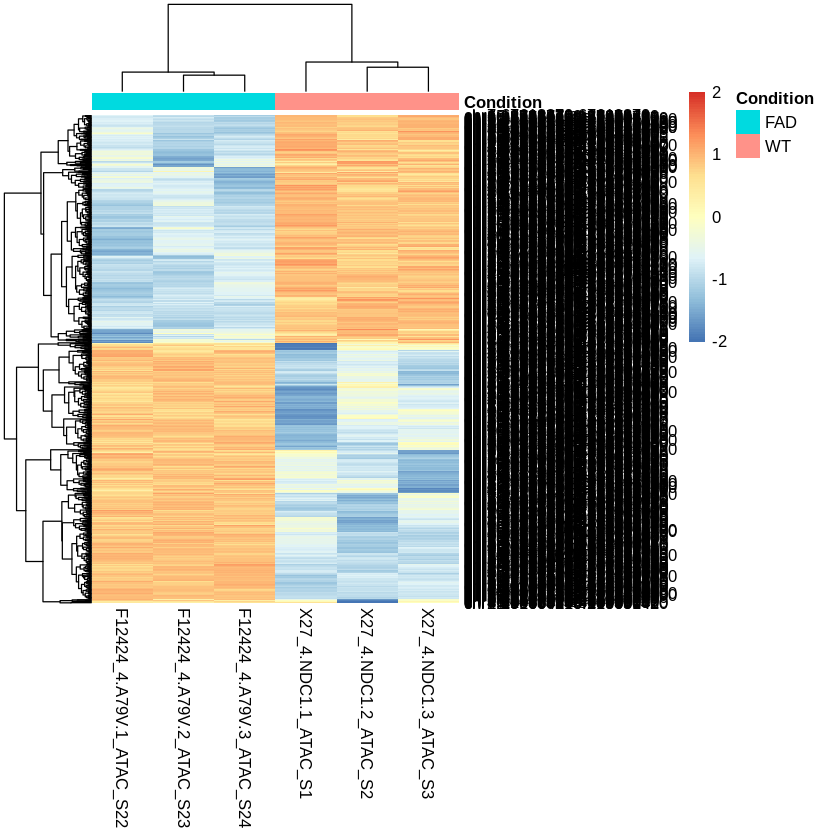

In [ ]:
# Select top 1000 most variable peaks
top_peaks <- logCPM[order(apply(logCPM, 1, var), decreasing=TRUE)[1:1000], ]
pheatmap(top_peaks, annotation_col=metadata, scale="row")


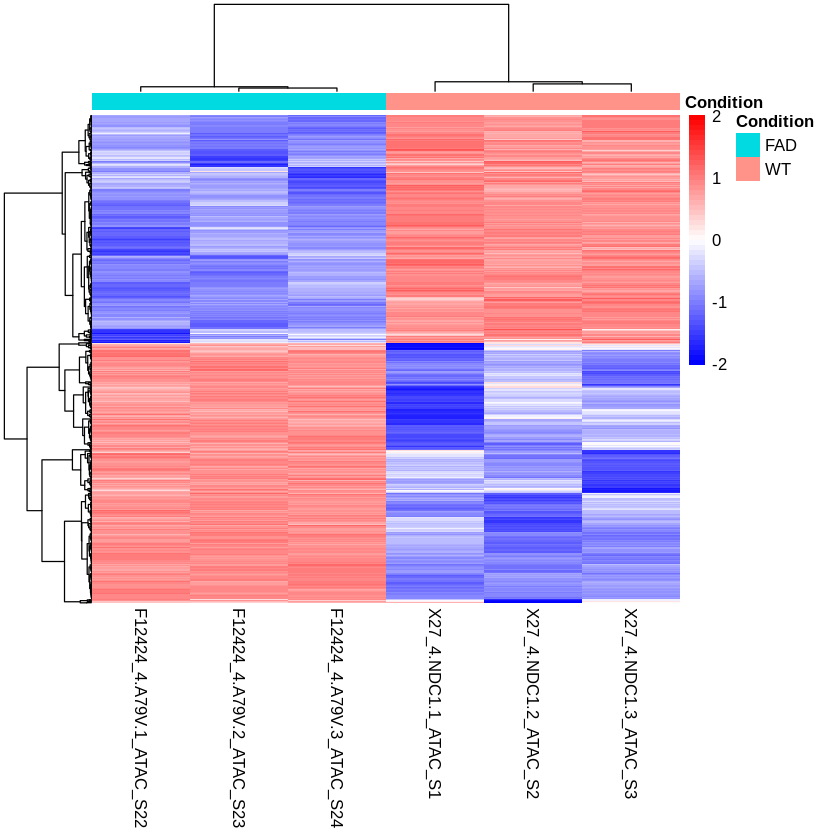

In [ ]:
pheatmap(logCPM[order(apply(logCPM, 1, var), decreasing=TRUE)[1:1000], ],
         scale="row",  # Normalize per row (peak-wise)
         clustering_distance_rows="correlation",  # Cluster based on correlation
         clustering_distance_cols="correlation",
         annotation_col=metadata,  # Add sample conditions
         show_rownames=FALSE,  # Hide row names (too many peaks)
         show_colnames=TRUE,  # Show sample names
         color = colorRampPalette(c("blue", "white", "red"))(50))

### Estimate & Plot Dispersion
Biological Coefficient of Variation (BCV) plot looks great! Here’s what it means:

X-axis (Average log CPM): Represents average expression levels (log counts per million). Y-axis (BCV values): Represents biological variation across samples. Black dots: Individual peaks with their estimated tagwise dispersions. \
\
**Red line:** Common dispersion estimate. \
**Blue line:** Trend dispersion across expression levels. \
\
**Interpretation:** \
Lowly expressed peaks (left side) tend to have higher variance, which is normal. Well-expressed peaks (right side) have lower variance, as expected. The trend line follows a smooth distribution, indicating a good fit.

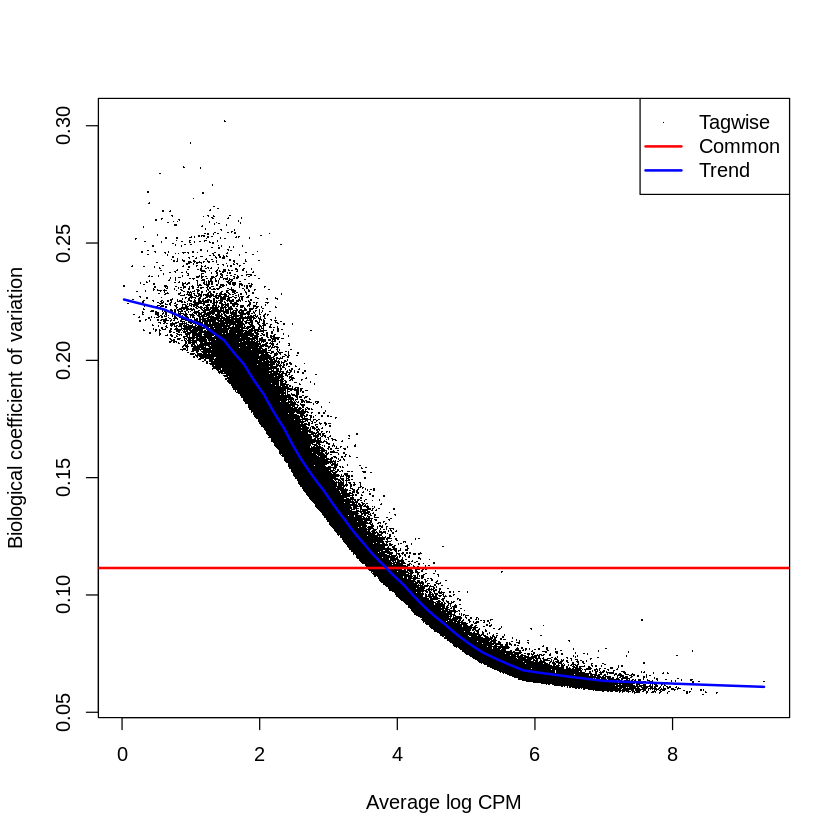

In [ ]:
# Estimate common dispersion
design <- model.matrix(~group)
dge_filtered <- estimateDisp(dge_filtered, design)

# Check dispersion estimates
plotBCV(dge_filtered)

In [ ]:
dge_filtered <- estimateDisp(dge_filtered, design)

In [ ]:
fit <- glmQLFit(dge_filtered, design)
results <- glmQLFTest(fit, coef=2)  # coef=2 compares FAD vs WT


In [ ]:
# Convert results to dataframe
diff_results <- topTags(results, n = Inf)$table

# Save results
write.csv(diff_results, "ATAC_edgeR_results.csv")


In [ ]:
open_threshold <- 1
closed_threshold <- -1
significant_fdr <- 0.05

# Define open and closed peaks
open_chromatin <- diff_results[diff_results$logFC > open_threshold & diff_results$FDR < significant_fdr, ]
closed_chromatin <- diff_results[diff_results$logFC < closed_threshold & diff_results$FDR < significant_fdr, ]

# Save results
write.csv(open_chromatin, "Open_Chromatin_Peaks.csv")
write.csv(closed_chromatin, "Closed_Chromatin_Peaks.csv")

# Count open vs. closed
cat("Open Chromatin Regions:", nrow(open_chromatin), "\n")
cat("Closed Chromatin Regions:", nrow(closed_chromatin), "\n")


Open Chromatin Regions: 5959 
Closed Chromatin Regions: 3784 


In [ ]:
# Load ggplot2
library(ggplot2)

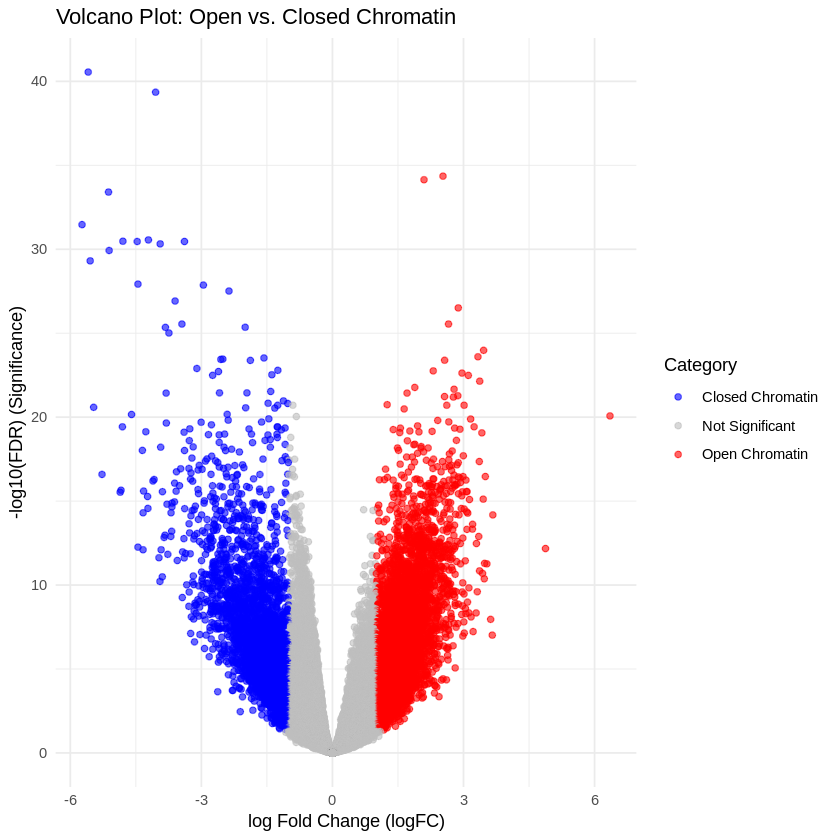

In [ ]:


# Define significance thresholds
open_threshold <- 1
closed_threshold <- -1
significant_fdr <- 0.05

# Add labels for classification
diff_results$Category <- "Not Significant"
diff_results$Category[diff_results$logFC > open_threshold & diff_results$FDR < significant_fdr] <- "Open Chromatin"
diff_results$Category[diff_results$logFC < closed_threshold & diff_results$FDR < significant_fdr] <- "Closed Chromatin"

# Volcano Plot
ggplot(diff_results, aes(x=logFC, y=-log10(FDR), color=Category)) +
  geom_point(alpha=0.6) +
  scale_color_manual(values=c("blue", "gray", "red")) +
  labs(title="Volcano Plot: Open vs. Closed Chromatin",
       x="log Fold Change (logFC)",
       y="-log10(FDR) (Significance)") +
  theme_minimal()


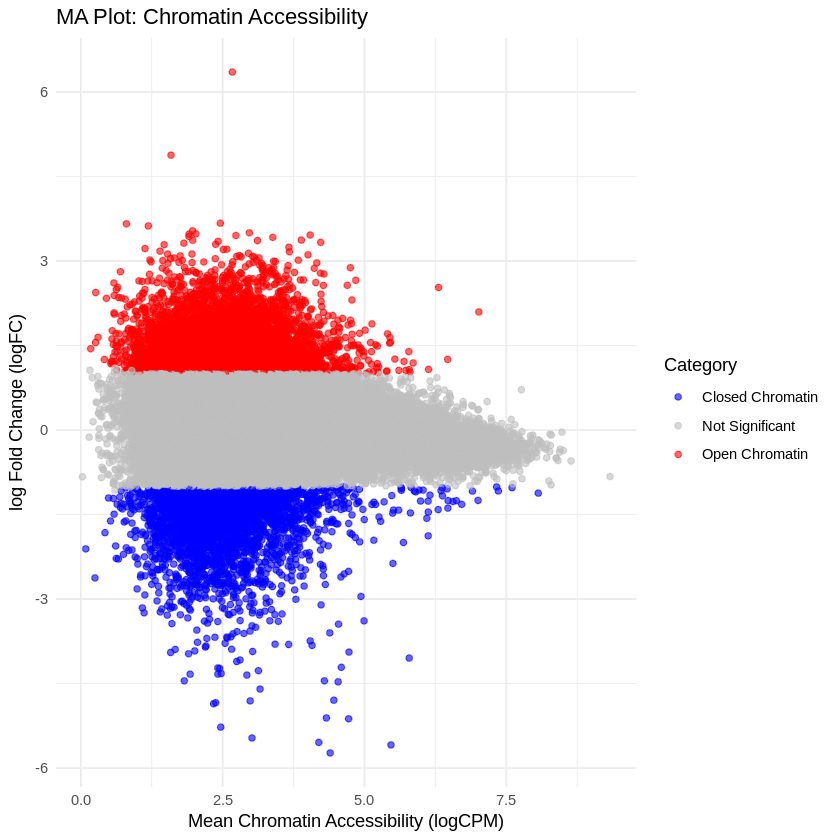

In [ ]:
ggplot(diff_results, aes(x=logCPM, y=logFC, color=Category)) +
  geom_point(alpha=0.6) +
  scale_color_manual(values=c("blue", "gray", "red")) +
  labs(title="MA Plot: Chromatin Accessibility",
       x="Mean Chromatin Accessibility (logCPM)",
       y="log Fold Change (logFC)") +
  theme_minimal()


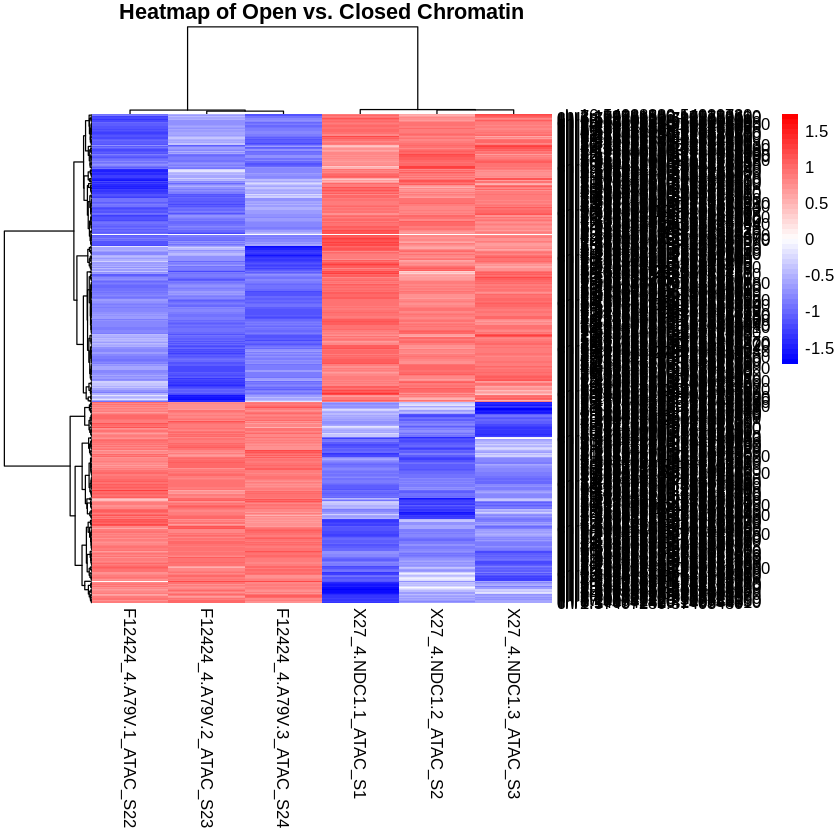

In [ ]:
library(pheatmap)

# Select top 500 most variable peaks
top_peaks <- diff_results[order(abs(diff_results$logFC), decreasing=TRUE)[1:500], ]

# Extract logCPM values for these peaks
heatmap_data <- logCPM[rownames(top_peaks), ]

# Generate heatmap
pheatmap(heatmap_data,
         scale="row",
         clustering_distance_rows="correlation",
         clustering_distance_cols="correlation",
         color = colorRampPalette(c("blue", "white", "red"))(50),
         main="Heatmap of Open vs. Closed Chromatin")


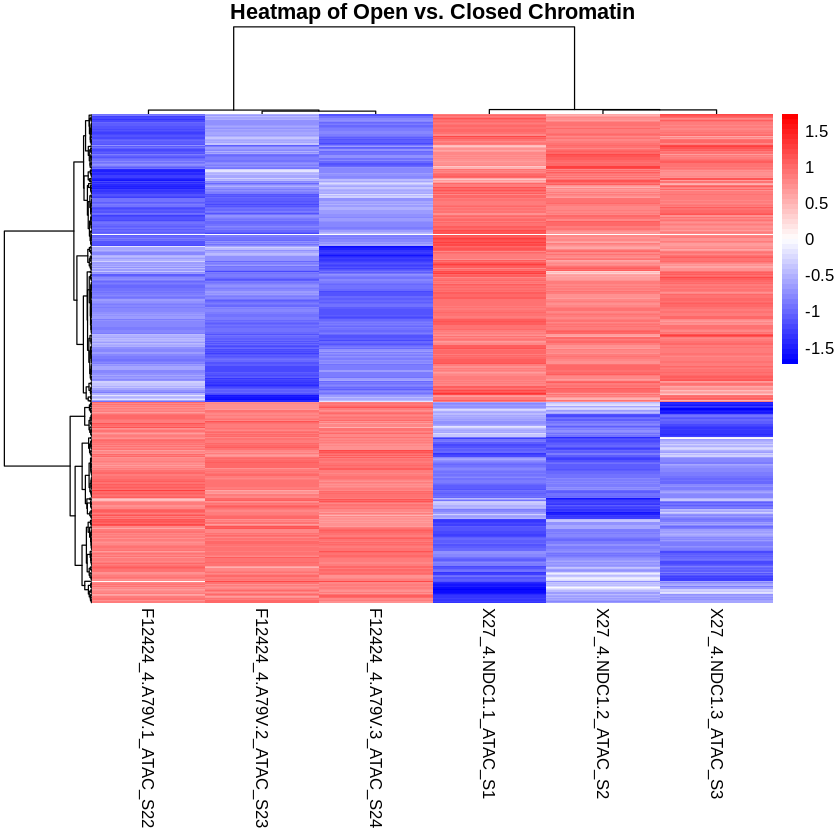

In [ ]:
pheatmap(heatmap_data, scale="row",
         clustering_distance_rows="correlation",
         clustering_distance_cols="correlation",
         color=colorRampPalette(c("blue", "white", "red"))(50),
         main="Heatmap of Open vs. Closed Chromatin",
         show_rownames=FALSE)  # Hide row names


### Fit Data & Volcano Plot
Understanding the Results Table Column Meaning logFC Log fold-change (positive = more accessible in FAD, negative = more accessible in WT) logCPM Log counts per million (expression level of the peak) F F-statistic from the quasi-likelihood test (higher = more significant) PValue Raw p-value (lower = more significant) FDR False discovery rate (adjusted p-value, typically < 0.05 is significant)

Top peaks (rows with lowest FDR) are the most differentially accessible regions. Negative logFC means peaks are more accessible in WT, while positive logFC means more accessible in FAD. FDR values are very low (~e-31 to e-41), meaning the results are statistically significant.

Warning message in makeContrasts(groupFAD, levels = design):
“Renaming (Intercept) to Intercept”


,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr10:38401430:38404060,-5.589090,5.467546,1257.1613,5.215170e-46,2.792202e-41
chr2:113602030:113605150,-4.047266,5.790049,1130.5329,1.647132e-44,4.409371e-40
chr3:147391180:147399460,2.530290,6.307152,780.2082,2.485082e-39,4.435042e-35
chr3:147403370:147425200,2.096127,7.016520,761.5002,5.363078e-39,7.178480e-35
chr6:26042920:26046350,-5.125372,4.721402,716.9301,3.665825e-38,3.925366e-34
chr10:122878840:122880540,-5.731487,4.396835,618.7478,3.813520e-36,3.402931e-32
chr12:130714170:130717280,-4.212062,4.591893,574.3683,3.638224e-35,2.782722e-31
chr12:128822630:128824980,-4.796213,4.459915,568.7266,4.981161e-35,3.333642e-31
chr5:3180864:3183584,-3.387154,4.993473,564.7693,6.097498e-35,3.446015e-31


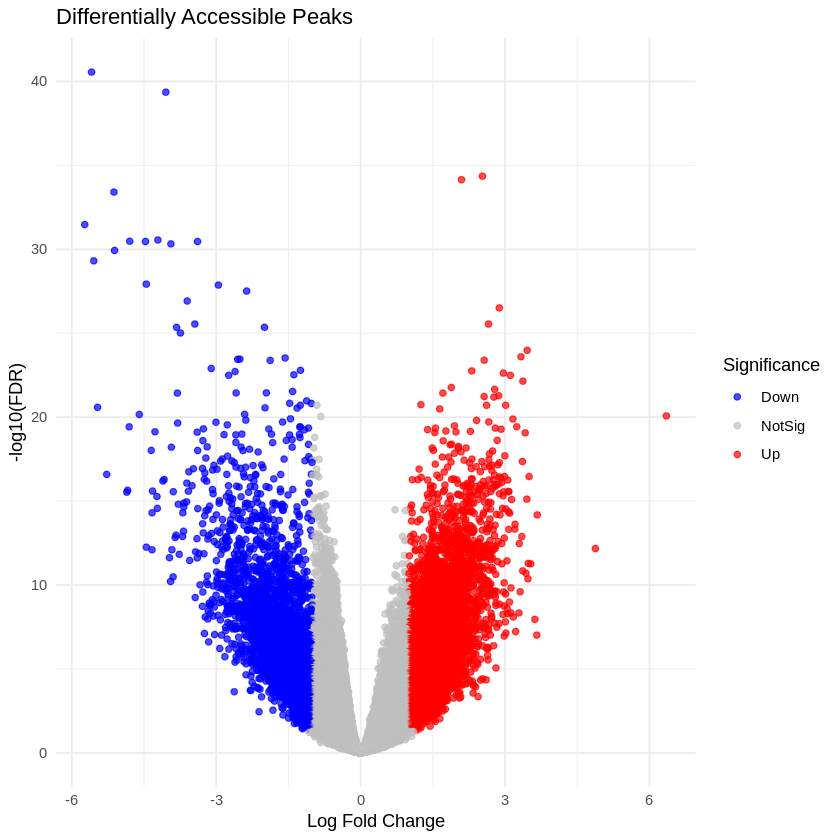

In [ ]:
# Fit the negative binomial generalized log-linear model
fit <- glmQLFit(dge_filtered, design)

# Test for differential accessibility
contrast_matrix <- makeContrasts(groupFAD, levels = design)
qlf <- glmQLFTest(fit, contrast=contrast_matrix)

# View top differentially accessible regions
topTags(qlf)

# Save progress
write.csv(topTags(qlf, n=Inf), "ATAC_edgeR_results.csv", row.names=TRUE)

# Prepare results for plotting
res <- as.data.frame(topTags(qlf, n=Inf))
res$Significance <- ifelse(res$FDR < 0.05 & abs(res$logFC) > 1,
                           ifelse(res$logFC > 0, "Up", "Down"), "NotSig")

# Create volcano plot
ggplot(res, aes(x=logFC, y=-log10(FDR), color=Significance)) +
  geom_point(alpha=0.7) +
  scale_color_manual(values=c("blue", "gray", "red")) +
  theme_minimal() +
  labs(title="Differentially Accessible Peaks",
       x="Log Fold Change", y="-log10(FDR)")

# # Save (not sure we need this? what is top_peaks)
# write.csv(top_peaks, file="ATAC_Top_DARs.csv", row.names=TRUE)
# file.exists("ATAC_Top_DARs.csv")  # Should return TRUE if saved correctly

# nrow(top_peaks)
# summary(res$FDR)  # See if any FDR values are < 0.05
# summary(abs(res$logFC))  # See if logFC > 1 exists


#Annotation (ChIPseeker)

In [ ]:


# Load the necessary library
library(GenomicRanges)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading requir

In [ ]:
# Read the full ATAC-seq peak file
atac_peaks <- read.csv("ATAC_edgeR_results.csv", row.names=1)

# Extract peak information (Chromosome, Start, End)
peak_info <- do.call(rbind, strsplit(rownames(atac_peaks), "[:-]"))
colnames(peak_info) <- c("chr", "start", "end")

# Convert to numeric
peak_info <- data.frame(chr = peak_info[,1],
                        start = as.numeric(peak_info[,2]),
                        end = as.numeric(peak_info[,3]))

# Convert to GRanges object
gr_peaks <- GRanges(seqnames = peak_info$chr,
                    ranges = IRanges(start = peak_info$start, end = peak_info$end))

# Check output
head(gr_peaks)


GRanges object with 6 ranges and 0 metadata columns:
      seqnames              ranges strand
         <Rle>           <IRanges>  <Rle>
  [1]    chr10   38401430-38404060      *
  [2]     chr2 113602030-113605150      *
  [3]     chr3 147391180-147399460      *
  [4]     chr3 147403370-147425200      *
  [5]     chr6   26042920-26046350      *
  [6]    chr10 122878840-122880540      *
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [ ]:
# Define thresholds
open_threshold <- 1
closed_threshold <- -1
significant_fdr <- 0.05

# Subset Open and Closed Peaks
open_peaks <- gr_peaks[atac_peaks$logFC > open_threshold & atac_peaks$FDR < significant_fdr]
closed_peaks <- gr_peaks[atac_peaks$logFC < closed_threshold & atac_peaks$FDR < significant_fdr]

# Save results
saveRDS(open_peaks, "Open_Chromatin_GRanges.rds")
saveRDS(closed_peaks, "Closed_Chromatin_GRanges.rds")


In [ ]:
# Load required libraries
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(org.Hs.eg.db)



ChIPseeker v1.42.1 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Qianwen Wang, Ming Li, Tianzhi Wu, Li Zhan, Lin Li, Meijun Chen, Wenqin
Xie, Zijing Xie, Erqiang Hu, Shuangbin Xu, Guangchuang Yu. Exploring
epigenomic datasets by ChIPseeker. Current Protocols. 2022, 2(10): e585



In [ ]:


# Load the hg38 gene annotation database
txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene


In [ ]:
# Annotate Open Chromatin
open_anno <- annotatePeak(open_peaks, TxDb=txdb, annoDb="org.Hs.eg.db")
write.csv(as.data.frame(open_anno), "ATAC_Open_Chromatin_Annotations.csv", row.names=FALSE)

# Annotate Closed Chromatin
closed_anno <- annotatePeak(closed_peaks, TxDb=txdb, annoDb="org.Hs.eg.db")
write.csv(as.data.frame(closed_anno), "ATAC_Closed_Chromatin_Annotations.csv", row.names=FALSE)


>> preparing features information...		 2025-03-18 01:06:32 AM 
>> identifying nearest features...		 2025-03-18 01:06:32 AM 
>> calculating distance from peak to TSS...	 2025-03-18 01:06:33 AM 
>> assigning genomic annotation...		 2025-03-18 01:06:33 AM 
>> adding gene annotation...			 2025-03-18 01:07:17 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2025-03-18 01:07:17 AM 
>> done...					 2025-03-18 01:07:17 AM 
>> preparing features information...		 2025-03-18 01:07:17 AM 
>> identifying nearest features...		 2025-03-18 01:07:17 AM 
>> calculating distance from peak to TSS...	 2025-03-18 01:07:18 AM 
>> assigning genomic annotation...		 2025-03-18 01:07:18 AM 
>> adding gene annotation...			 2025-03-18 01:07:24 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2025-03-18 01:07:25 AM 
>> done...					 2025-03-18 01:07:25 AM 


In [ ]:
# Load required libraries
library(ggplot2)
library(dplyr)



Attaching package: ‘dplyr’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:

# Read annotated peak data
open_anno_df <- read.csv("ATAC_Open_Chromatin_Annotations.csv")
closed_anno_df <- read.csv("ATAC_Closed_Chromatin_Annotations.csv")

# Function to group similar annotations
group_annotation <- function(annotation) {
  if (grepl("Promoter", annotation)) {
    return("Promoter")
  } else if (grepl("Enhancer", annotation)) {
    return("Enhancer")
  } else if (grepl("Distal Intergenic", annotation)) {
    return("Distal Intergenic")
  } else if (grepl("Exon", annotation)) {
    return("Exon")
  } else if (grepl("Intron", annotation)) {
    return("Intron")
  } else {
    return("Other")
  }
}

# Apply annotation grouping
open_anno_df$Category <- sapply(open_anno_df$annotation, group_annotation)
closed_anno_df$Category <- sapply(closed_anno_df$annotation, group_annotation)


In [ ]:
# Count occurrences in each category
open_category_counts <- open_anno_df %>% count(Category)
closed_category_counts <- closed_anno_df %>% count(Category)

# Add Type labels
open_category_counts$Type <- "Open"
closed_category_counts$Type <- "Closed"

# Merge data for plotting
combined_category_df <- rbind(open_category_counts, closed_category_counts)


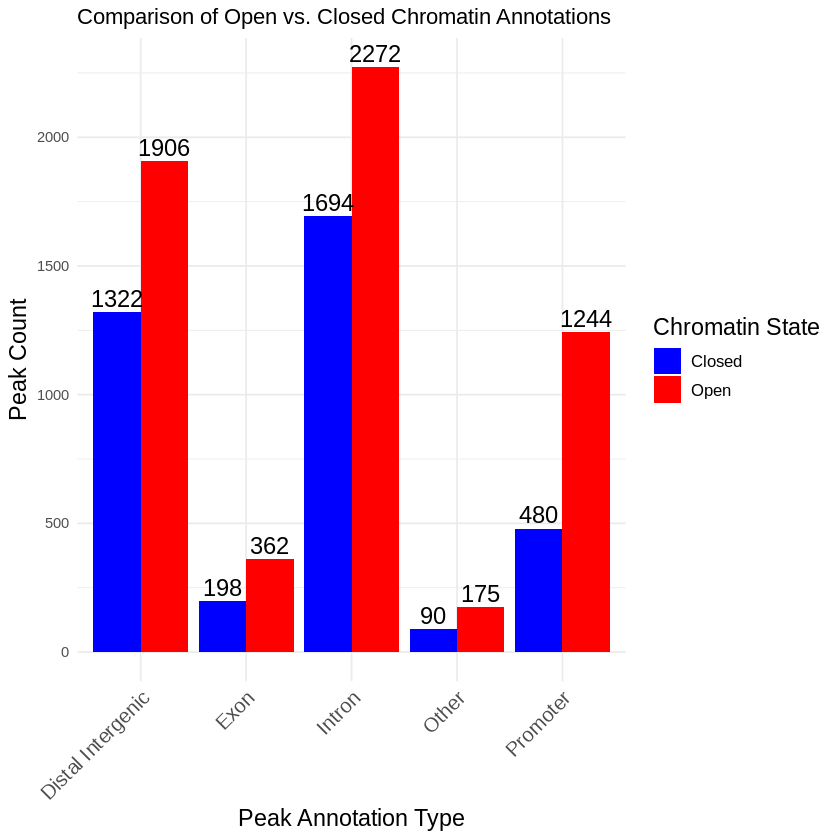

In [ ]:
# Define colors for Open vs. Closed chromatin
open_closed_colors <- c("Open" = "red", "Closed" = "blue")

# Create bar plot with count labels
ggplot(combined_category_df, aes(x=Category, y=n, fill=Type)) +
  geom_bar(stat="identity", position="dodge") +  # Bar plot
  geom_text(aes(label=n), position=position_dodge(width=0.9), vjust=-0.3, size=5) +  # Add counts
  scale_fill_manual(values=open_closed_colors) +
  labs(title="Comparison of Open vs. Closed Chromatin Annotations",
       x="Peak Annotation Type",
       y="Peak Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=12),
        axis.title = element_text(size=14),
        legend.text = element_text(size=10),
        legend.title = element_text(size=14)) +
  guides(fill=guide_legend(title="Chromatin State"))


In [ ]:

# Extract logCPM values for FAD (PSEN1) and WT (NDC)
# Adjust column names based on your dataset
psen1_mutant <- atac_counts[, "PSEN1_FAD"]
wt_control <- atac_counts[, "WT_NDC"]

# Create a data frame for plotting
scatter_df <- data.frame(
  log2_NDC = wt_control,  # x-axis (Control)
  log2_FAD = psen1_mutant  # y-axis (PSEN1 mutant)
)

# Assign colors based on accessibility
scatter_df$category <- "Not Significant"
scatter_df$category[scatter_df$log2_FAD > scatter_df$log2_NDC] <- "Open"
scatter_df$category[scatter_df$log2_FAD < scatter_df$log2_NDC] <- "Closed"

# Plot the scatter plot
ggplot(scatter_df, aes(x=log2_NDC, y=log2_FAD, color=category)) +
  geom_point(alpha=0.4, size=0.5) +
  scale_color_manual(values=c("gray", "red", "blue")) +
  labs(title="PSEN1 ATAC-seq Accessibility",
       x="log2 ATAC-Seq NDC (Control)",
       y="log2 ATAC-Seq FAD (PSEN1 Mutant)") +
  theme_minimal()


ERROR: Error in `[.data.frame`(atac_counts, , "PSEN1_FAD"): undefined columns selected


In [ ]:
#annotation for all peaks
# Load the hg38 gene annotation database
txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene

# Annotate peaks
peak_anno <- annotatePeak(gr_peaks, TxDb=txdb, annoDb="org.Hs.eg.db")

# View annotated peaks
head(as.data.frame(peak_anno))

ERROR: Error in annotatePeak(gr_peaks, TxDb = txdb, annoDb = "org.Hs.eg.db"): could not find function "annotatePeak"


In [ ]:
# Convert to data frame
peak_anno_df <- as.data.frame(peak_anno)

# Save annotated peaks
write.csv(peak_anno_df, "ATAC_Annotated_Peaks.csv", row.names=FALSE)

# Save as BED file
gr_peaks <- GenomicRanges::makeGRangesFromDataFrame(peak_anno_df)
# peaks_gr <- GRanges(
#   seqnames = annotated_peaks$seqnames,
#   ranges = IRanges(start = annotated_peaks$start, end = annotated_peaks$end),
# )
export.bed(gr_peaks, "atacpeaks.bed")

#Integration
(transferred from different notebook, not presently working for some reason)

In [ ]:
# Load required packages
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("plyranges")


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.3 (2025-02-28)

Installing package(s) 'plyranges'

also installing the dependencies ‘SparseArray’, ‘S4Arrays’, ‘DelayedArray’, ‘XVector’, ‘Biostrings’, ‘BiocIO’, ‘restfulr’, ‘SummarizedExperiment’, ‘UCSC.utils’, ‘Rhtslib’, ‘IRanges’, ‘GenomicRanges’, ‘rtracklayer’, ‘GenomicAlignments’, ‘GenomeInfoDb’, ‘Rsamtools’, ‘S4Vectors’


Old packages: 'commonmark', 'knitr', 'mime', 'tzdb', 'xml2'



In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("dplyr")

In [ ]:
library(dplyr)
library(plyranges)

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("plyranges")
library(dplyr)
library(readr)
library(GenomicRanges)
library(plyranges)

**deleting everything besides promoter and exons**

still need to do that for enrichment

In [ ]:
# Load Open and Closed Chromatin annotation results
open_anno_df <- read.csv("ATAC_Open_Chromatin_Annotations.csv")
closed_anno_df <- read.csv("ATAC_Closed_Chromatin_Annotations.csv")

# Remove rows with NA values
open_anno_df <- na.omit(open_anno_df)
closed_anno_df <- na.omit(closed_anno_df)

# Keep only peaks in Promoter or Exon regions
open_filtered <- open_anno_df[grep("Promoter|Exon", open_anno_df$annotation), ]
closed_filtered <- closed_anno_df[grep("Promoter|Exon", closed_anno_df$annotation), ]

# Save filtered results
write.csv(open_filtered, "Filtered_Open_Chromatin_Promoters_Exons.csv", row.names=FALSE)
write.csv(closed_filtered, "Filtered_Closed_Chromatin_Promoters_Exons.csv", row.names=FALSE)


In [ ]:
colnames(open_filtered)
colnames(closed_filtered)


[1] "seqnames"      "start"         "end"           "width"        
 [5] "strand"        "annotation"    "geneChr"       "geneStart"    
 [9] "geneEnd"       "geneLength"    "geneStrand"    "geneId"       
[13] "transcriptId"  "distanceToTSS" "ENSEMBL"       "SYMBOL"       
[17] "GENENAME"

[1] "seqnames"      "start"         "end"           "width"        
 [5] "strand"        "annotation"    "geneChr"       "geneStart"    
 [9] "geneEnd"       "geneLength"    "geneStrand"    "geneId"       
[13] "transcriptId"  "distanceToTSS" "ENSEMBL"       "SYMBOL"       
[17] "GENENAME"

In [ ]:
rna_seq <- read.csv("DESeq2_results2.csv")  # Ensure it has "gene_name" or "gene_symbol"


In [ ]:
colnames(rna_seq)

[1] "gene_name"      "gene_symbol"    "baseMean"       "log2FoldChange"
[5] "lfcSE"          "stat"           "pvalue"         "padj"

In [ ]:
# Convert ENSEMBL IDs to character type
open_filtered$ENSEMBL <- as.character(open_filtered$ENSEMBL)
closed_filtered$ENSEMBL <- as.character(closed_filtered$ENSEMBL)
rna_seq$gene_name <- as.character(rna_seq$gene_name)

# Remove duplicate ENSEMBL IDs before merging
open_filtered <- open_filtered[!duplicated(open_filtered$ENSEMBL), ]
closed_filtered <- closed_filtered[!duplicated(closed_filtered$ENSEMBL), ]


In [ ]:
library(GenomicRanges)
library(plyranges)

# Convert Open Chromatin to GRanges
open_gr <- GRanges(
    seqnames = open_filtered$seqnames,
    ranges = IRanges(start = open_filtered$start, end = open_filtered$end),
    strand = open_filtered$strand,
    gene_id = open_filtered$ENSEMBL
)

# Convert Closed Chromatin to GRanges
closed_gr <- GRanges(
    seqnames = closed_filtered$seqnames,
    ranges = IRanges(start = closed_filtered$start, end = closed_filtered$end),
    strand = closed_filtered$strand,
    gene_id = closed_filtered$ENSEMBL
)

# Save GRanges objects for later
saveRDS(open_gr, "Filtered_Open_Chromatin_GRanges.rds")
saveRDS(closed_gr, "Filtered_Closed_Chromatin_GRanges.rds")


In [ ]:
# Load the saved GRanges objects for ATAC-seq peaks
open_peaks <- readRDS("Filtered_Open_Chromatin_GRanges.rds")
closed_peaks <- readRDS("Filtered_Closed_Chromatin_GRanges.rds")

# Load RNA-seq differential expression data
rna_seq <- read.csv("DESeq2_results2.csv")  # Ensure it has "gene_name" or "gene_symbol"


In [ ]:
library(TxDb.Hsapiens.UCSC.hg38.knownGene)

# Load gene annotation database
txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene

# Extract gene coordinates as GRanges
gene_ranges <- genes(txdb)

# Ensure gene IDs are included
gene_ranges$gene_id <- names(gene_ranges)


  2162 genes were dropped because they have exons located on both strands
  of the same reference sequence or on more than one reference sequence,
  so cannot be represented by a single genomic range.
  Use 'single.strand.genes.only=FALSE' to get all the genes in a
  GRangesList object, or use suppressMessages() to suppress this message.



In [ ]:
# Find genes overlapping Open Chromatin (Promoters & Exons)
open_genes <- open_gr %>% join_overlap_inner(gene_ranges)

# Find genes overlapping Closed Chromatin (Promoters & Exons)
closed_genes <- closed_gr %>% join_overlap_inner(gene_ranges)

# Convert to DataFrame
open_genes_df <- as.data.frame(open_genes)
closed_genes_df <- as.data.frame(closed_genes)

# View first few rows
head(open_genes_df)
head(closed_genes_df)


,seqnames,start,end,width,strand,gene_id.x,gene_id.y
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>
1,chr1,159779450,159782150,2701,*,ENSG00000158716,54935
2,chr8,7354500,7356700,2201,*,ENSG00000215374,100128890
3,chr9,25677150,25679150,2001,*,ENSG00000198680,286319
4,chr4,54226700,54231480,4781,*,ENSG00000134853,5156
5,chr13,99967050,99972670,5621,*,ENSG00000139800,85416
6,chr12,9062940,9066970,4031,*,ENSG00000245105,144571


,seqnames,start,end,width,strand,gene_id.x,gene_id.y
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>
1,chr6,26042920,26046350,3431,*,ENSG00000276410,3018
2,chr6,26042920,26046350,3431,*,ENSG00000276410,8352
3,chr10,122878840,122880540,1701,*,ENSG00000286088,100533195
4,chr10,122878840,122880540,1701,*,ENSG00000286088,196792
5,chr10,122878840,122880540,1701,*,ENSG00000286088,399815
6,chr12,130714170,130717280,3111,*,ENSG00000060709,23504


In [ ]:
# Check column names in open and closed gene data
colnames(open_genes_df)
colnames(closed_genes_df)
colnames(rna_seq)


[1] "seqnames"  "start"     "end"       "width"     "strand"    "gene_id.x"
[7] "gene_id.y"

[1] "seqnames"  "start"     "end"       "width"     "strand"    "gene_id.x"
[7] "gene_id.y"

[1] "gene_name"      "gene_symbol"    "baseMean"       "log2FoldChange"
[5] "lfcSE"          "stat"           "pvalue"         "padj"

In [ ]:
# Rename gene_id.x to gene_id in ATAC-seq data
colnames(open_genes_df)[colnames(open_genes_df) == "gene_id.x"] <- "gene_id"
colnames(closed_genes_df)[colnames(closed_genes_df) == "gene_id.x"] <- "gene_id"

# Rename RNA-seq gene_name to match ENSEMBL IDs
colnames(rna_seq)[colnames(rna_seq) == "gene_name"] <- "ENSEMBL"

# Convert to character type
open_genes_df$gene_id <- as.character(open_genes_df$gene_id)
closed_genes_df$gene_id <- as.character(closed_genes_df$gene_id)
rna_seq$ENSEMBL <- as.character(rna_seq$ENSEMBL)

# Remove duplicate gene IDs before merging
open_genes_df <- open_genes_df[!duplicated(open_genes_df$gene_id), ]
closed_genes_df <- closed_genes_df[!duplicated(closed_genes_df$gene_id), ]


In [ ]:
colnames(open_genes_df)
colnames(closed_genes_df)
colnames(rna_seq)

# View first few rows
head(open_genes_df)
head(closed_genes_df)
head(rna_seq)


[1] "seqnames"  "start"     "end"       "width"     "strand"    "gene_id"  
[7] "gene_id.y"

[1] "seqnames"  "start"     "end"       "width"     "strand"    "gene_id"  
[7] "gene_id.y"

[1] "ENSEMBL"        "gene_symbol"    "baseMean"       "log2FoldChange"
[5] "lfcSE"          "stat"           "pvalue"         "padj"

,seqnames,start,end,width,strand,gene_id,gene_id.y
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>
1,chr1,159779450,159782150,2701,*,ENSG00000158716,54935
2,chr8,7354500,7356700,2201,*,ENSG00000215374,100128890
3,chr9,25677150,25679150,2001,*,ENSG00000198680,286319
4,chr4,54226700,54231480,4781,*,ENSG00000134853,5156
5,chr13,99967050,99972670,5621,*,ENSG00000139800,85416
6,chr12,9062940,9066970,4031,*,ENSG00000245105,144571


,seqnames,start,end,width,strand,gene_id,gene_id.y
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>
1,chr6,26042920,26046350,3431,*,ENSG00000276410,3018
3,chr10,122878840,122880540,1701,*,ENSG00000286088,100533195
6,chr12,130714170,130717280,3111,*,ENSG00000060709,23504
7,chr12,128822630,128824980,2351,*,ENSG00000139370,121260
8,chr5,3180864,3183584,2721,*,ENSG00000249808,102467074
9,chr7,64312950,64315460,2511,*,ENSG00000234444,728927


,ENSEMBL,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000003,TSPAN6,1180.48955,0.9454236,0.1018443,9.2830280,1.650000e-20,4.400000e-19
2,ENSG00000000005,TNMD,55.99804,3.0553369,0.3888154,7.8580647,3.900000e-15,6.950000e-14
3,ENSG00000000419,DPM1,607.34226,0.2566464,0.1316665,1.9492158,5.126966e-02,1.185777e-01
4,ENSG00000000457,SCYL3,446.76244,-0.1228553,0.1389497,-0.8841705,3.766042e-01,5.445565e-01
5,ENSG00000000460,C1orf112,291.94950,0.6548542,0.1805066,3.6278675,2.857720e-04,1.248557e-03
6,ENSG00000000971,CFH,17.77782,0.5457063,0.7776255,0.7017598,4.828289e-01,6.445526e-01


In [ ]:
# Merge Open Chromatin genes with RNA-seq
open_merged <- merge(open_genes_df, rna_seq, by.x="gene_id", by.y="ENSEMBL", all.x=TRUE)

# Merge Closed Chromatin genes with RNA-seq
closed_merged <- merge(closed_genes_df, rna_seq, by.x="gene_id", by.y="ENSEMBL", all.x=TRUE)


In [ ]:
cat("Genes in Open Chromatin Regions:", nrow(open_merged), "\n")
cat("Genes in Closed Chromatin Regions:", nrow(closed_merged), "\n")

# View the first few rows
head(open_merged)
head(closed_merged)


Genes in Open Chromatin Regions: 1110 
Genes in Closed Chromatin Regions: 442 


,gene_id,seqnames,start,end,width,strand,gene_id.y,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000001626,chr7,117282410,117284230,1821,*,7472,CFTR,18.972606,0.61553246,0.64665221,0.9518756,3.411601e-01,5.093295e-01
2,ENSG00000003147,chr7,8154250,8154970,721,*,3382,ICA1,267.089654,-1.54396479,0.19020016,-8.1175790,4.760000e-16,9.000000e-15
3,ENSG00000005108,chr7,11408770,11411880,3111,*,221981,THSD7A,3675.920896,0.14905851,0.09068152,1.6437584,1.002261e-01,2.027719e-01
4,ENSG00000006453,chr7,98400390,98401600,1211,*,55971,BAIAP2L1,8.908739,1.89932307,0.89136004,2.1308147,3.310441e-02,8.233074e-02
5,ENSG00000006468,chr7,13907730,13910040,2311,*,2115,ETV1,1143.942264,-0.16380210,0.09240213,-1.7727091,7.627693e-02,1.632382e-01
6,ENSG00000006715,chr7,38774710,38776630,1921,*,27072,VPS41,2534.845018,0.03544156,0.08928646,0.3969421,6.914101e-01,8.109563e-01


,gene_id,seqnames,start,end,width,strand,gene_id.y,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000005421,chr7,95285380,95286250,871,*,55607,NA,NA,NA,NA,NA,NA,NA
2,ENSG00000011465,chr12,91174510,91176160,1651,*,1634,DCN,43.95683,0.9572372,0.51024908,1.8760195,6.065260e-02,1.358119e-01
3,ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.13220,-2.8703311,0.38191246,-7.5156780,5.660000e-14,9.070000e-13
4,ENSG00000039139,chr5,13865254,13866010,757,*,1767,DNAH5,101.21196,1.3043401,0.27602977,4.7253602,2.300000e-06,1.500000e-05
5,ENSG00000055609,chr7,152401940,152403940,2001,*,58508,KMT2C,3050.99943,-0.6324751,0.08805679,-7.1825821,6.840000e-13,9.990000e-12
6,ENSG00000058085,chr1,183214220,183216080,1861,*,3918,LAMC2,12.13978,-0.1196728,0.68229008,-0.1753987,8.607664e-01,9.196580e-01


In [ ]:
# Save results
write.csv(open_merged, "Open_Chromatin_Integrated_with_RNAseq.csv", row.names=FALSE)
write.csv(closed_merged, "Closed_Chromatin_Integrated_with_RNAseq.csv", row.names=FALSE)

# Also save as RDS for easier reloading in R
saveRDS(open_merged, "Open_Chromatin_Integrated_with_RNAseq.rds")
saveRDS(closed_merged, "Closed_Chromatin_Integrated_with_RNAseq.rds")


In [ ]:
Open_Chromatin <- read.csv("Open_Chromatin_Integrated_with_RNAseq.csv")
Closed_Chromatin <- read.csv("Closed_Chromatin_Integrated_with_RNAseq.csv")

In [ ]:
Open_Chromatin

gene_id,seqnames,start,end,width,strand,gene_id.y,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Type
<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000001626,chr7,117282410,117284230,1821,*,7472,CFTR,18.972606,0.61553246,0.64665221,0.9518756,3.411601e-01,5.093295e-01,Open
ENSG00000003147,chr7,8154250,8154970,721,*,3382,ICA1,267.089654,-1.54396479,0.19020016,-8.1175790,4.760000e-16,9.000000e-15,Open
ENSG00000005108,chr7,11408770,11411880,3111,*,221981,THSD7A,3675.920896,0.14905851,0.09068152,1.6437584,1.002261e-01,2.027719e-01,Open
ENSG00000006453,chr7,98400390,98401600,1211,*,55971,BAIAP2L1,8.908739,1.89932307,0.89136004,2.1308147,3.310441e-02,8.233074e-02,Open
ENSG00000006468,chr7,13907730,13910040,2311,*,2115,ETV1,1143.942264,-0.16380210,0.09240213,-1.7727091,7.627693e-02,1.632382e-01,Open
ENSG00000006715,chr7,38774710,38776630,1921,*,27072,VPS41,2534.845018,0.03544156,0.08928646,0.3969421,6.914101e-01,8.109563e-01,Open
ENSG00000007237,chr17,10019650,10020820,1171,*,8522,GAS7,192.645527,0.42430869,0.36499037,1.1625202,2.450242e-01,4.008686e-01,Open
ENSG00000007372,chr11,31797400,31801860,4461,*,5080,PAX6,1306.277647,4.20329169,0.14699240,28.5953002,7.690000e-180,1.220000e-176,Open
ENSG00000008083,chr6,15502900,15505980,3081,*,3720,JARID2,821.708445,-0.13471104,0.13637275,-0.9878149,3.232433e-01,4.891993e-01,Open


In [ ]:
library(ggplot2)

Warning message:
“Removed 244 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message:
“Removed 103 rows containing non-finite outside the scale range
(`stat_density()`).”


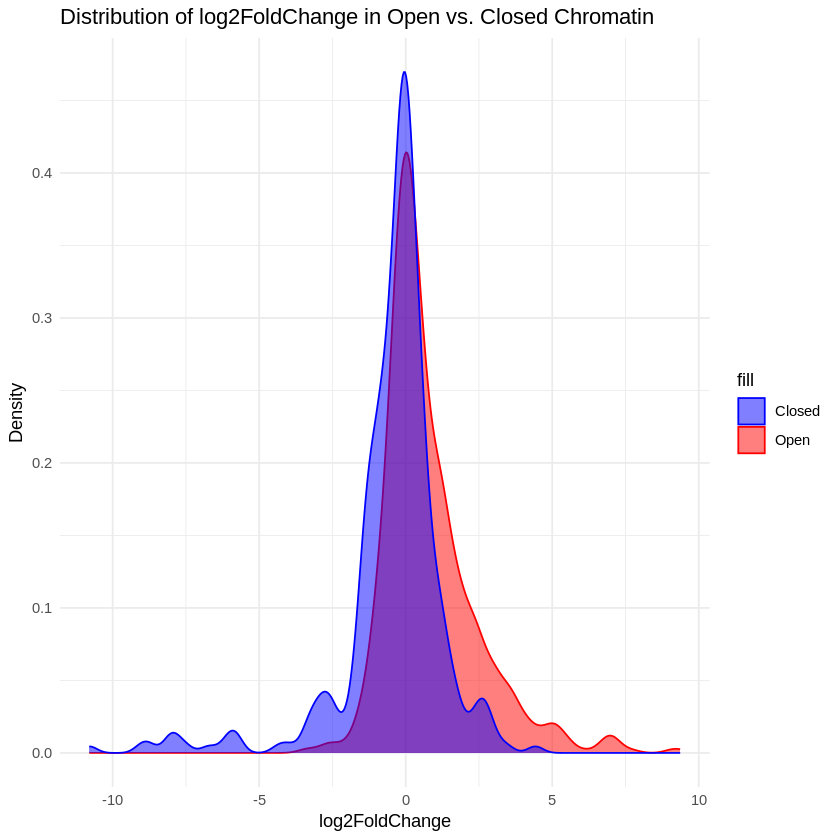

In [ ]:
library(ggplot2)

# Plot log2FoldChange distribution for Open vs. Closed Chromatin
ggplot() +
  geom_density(data = open_merged, aes(x = log2FoldChange, fill = "Open"), alpha = 0.5, color = "red") +
  geom_density(data = closed_merged, aes(x = log2FoldChange, fill = "Closed"), alpha = 0.5, color = "blue") +
  scale_fill_manual(values = c("Open" = "red", "Closed" = "blue")) +
  labs(title = "Distribution of log2FoldChange in Open vs. Closed Chromatin",
       x = "log2FoldChange",
       y = "Density") +
  theme_minimal()


In [ ]:
# Perform Wilcoxon rank-sum test (non-parametric)
wilcox.test(open_merged$log2FoldChange, closed_merged$log2FoldChange)



	Wilcoxon rank sum test with continuity correction

data:  open_merged$log2FoldChange and closed_merged$log2FoldChange
W = 204160, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 347 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 347 rows containing missing values or values outside the scale range
(`geom_point()`).”


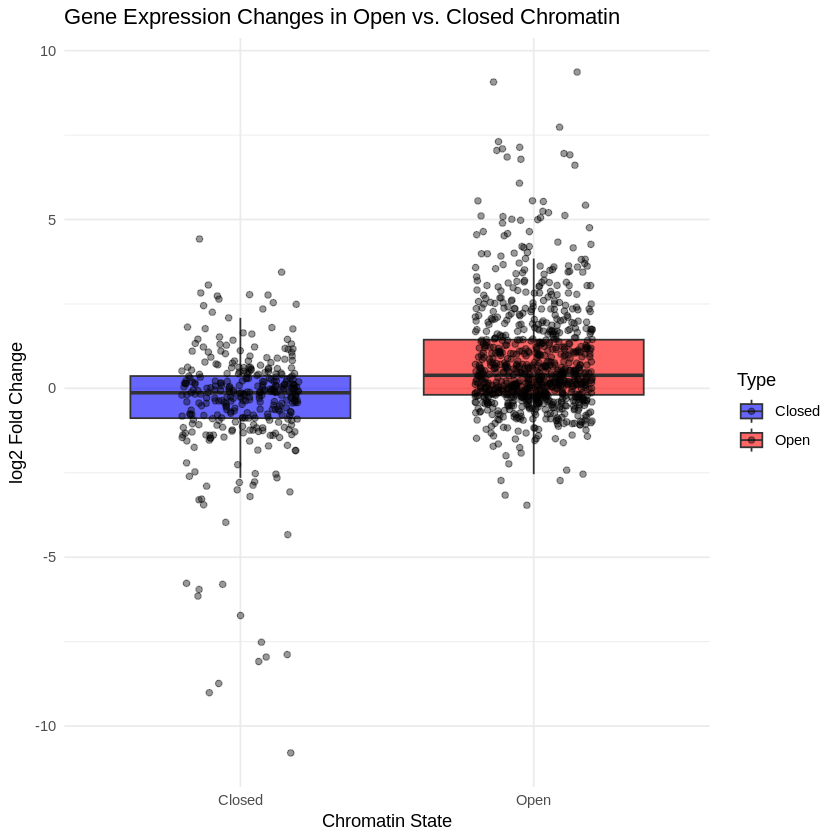

In [ ]:
# Combine open and closed datasets for plotting
open_merged$Type <- "Open"
closed_merged$Type <- "Closed"
combined_data <- rbind(open_merged, closed_merged)

# Plot Boxplot
ggplot(combined_data, aes(x = Type, y = log2FoldChange, fill = Type)) +
  geom_boxplot(alpha = 0.6, outlier.shape = NA) +
  geom_jitter(width = 0.2, alpha = 0.4) +
  scale_fill_manual(values = c("Open" = "red", "Closed" = "blue")) +
  labs(title = "Gene Expression Changes in Open vs. Closed Chromatin",
       x = "Chromatin State",
       y = "log2 Fold Change") +
  theme_minimal()


In [ ]:
# Add Chromatin Type Column to Each DataFrame
open_atac_rna$Type <- "Open"
closed_atac_rna$Type <- "Closed"

# Combine Open and Closed Chromatin Data
combined_data <- bind_rows(open_atac_rna, closed_atac_rna)


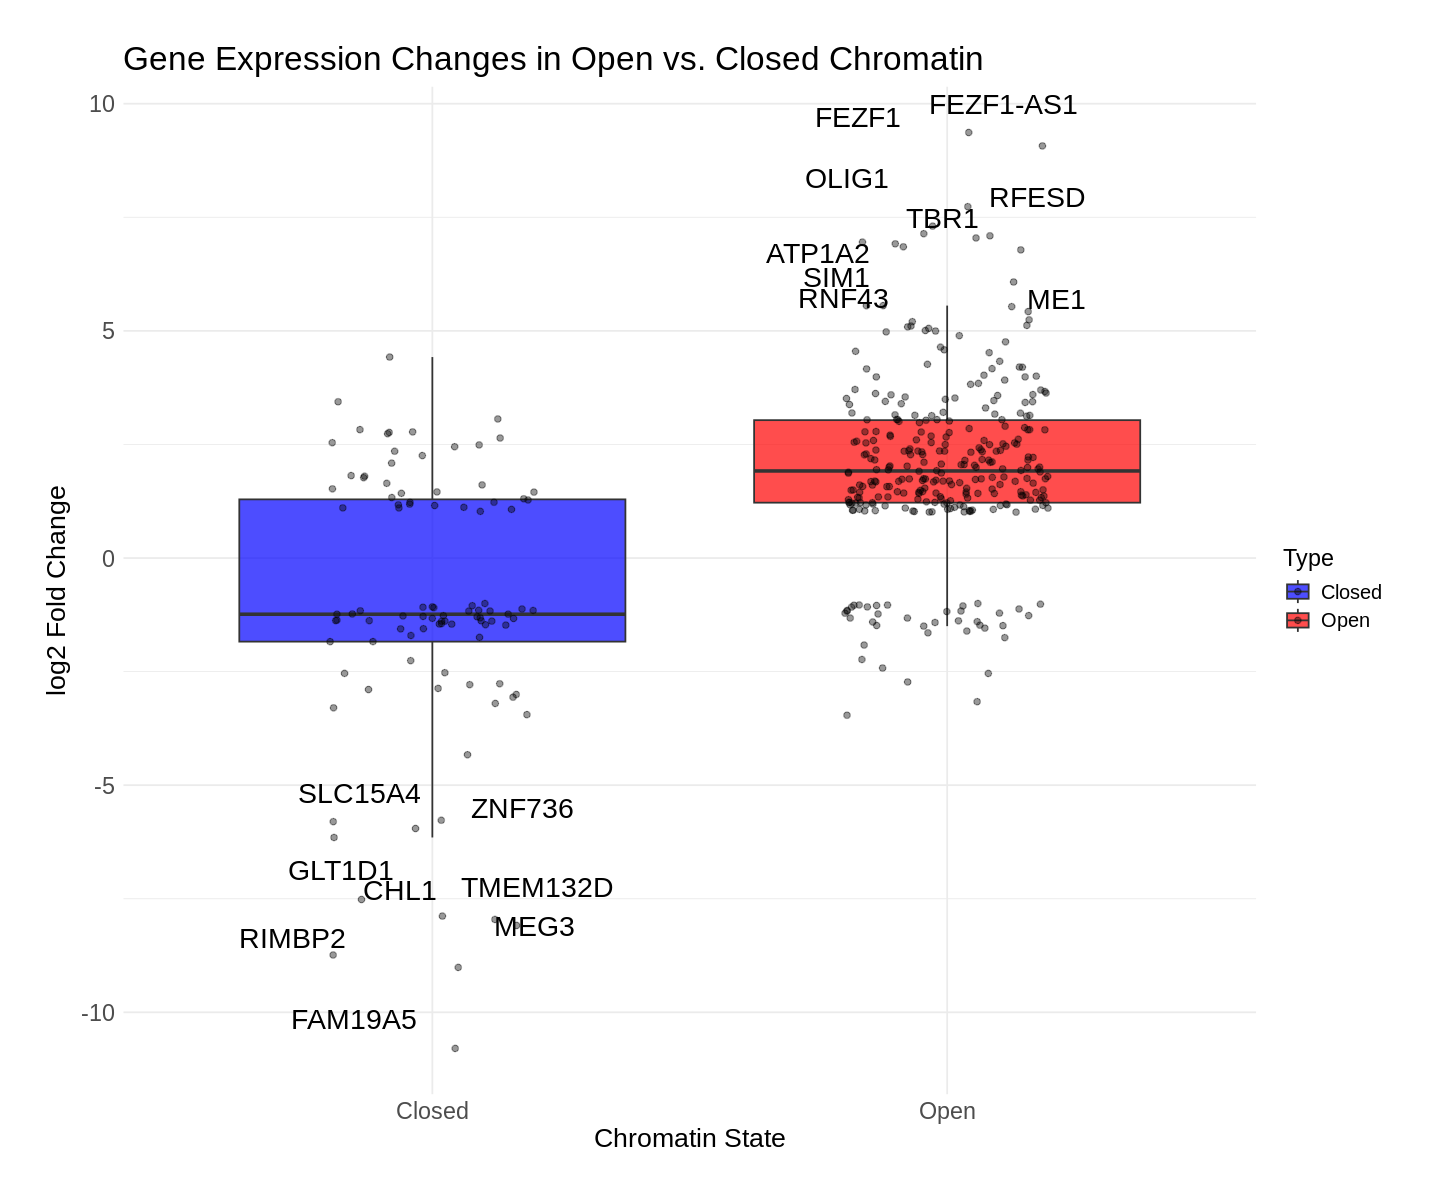

In [ ]:
library(ggplot2)
library(dplyr)

# Define filtering criteria for significant genes
significant_genes <- combined_data %>%
  filter(padj < 0.05 & abs(log2FoldChange) > 5)  # Only highly significant genes

# Plot Boxplot with Only Most Significant Genes Annotated
ggplot(combined_data, aes(x = Type, y = log2FoldChange, fill = Type)) +
  geom_boxplot(alpha = 0.7, outlier.shape = NA) +  # Boxplot without outlier dots
  geom_jitter(width = 0.2, alpha = 0.4) +  # Jitter to show individual points
  geom_text(data = significant_genes, aes(label = gene_symbol),
            position = position_jitter(width = 0.3, height = 0),
            size = 6, vjust = -1, check_overlap = TRUE) +  # Add gene labels
  scale_fill_manual(values = c("Open" = "red", "Closed" = "blue")) +
  labs(title = "Gene Expression Changes in Open vs. Closed Chromatin",
       x = "Chromatin State",
       y = "log2 Fold Change") +
  theme_minimal()+
  theme(
    plot.title = element_text(size = 20),  # Increase title size
    axis.title = element_text(size = 16),  # Increase axis title size
    axis.text = element_text(size = 14),    # Increase axis text size
    legend.title = element_text(size = 14), # Increase legend title size
    legend.text = element_text(size = 12)   # Increase legend text size
  ) +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))  # Adjust margins if needed


In [ ]:
# Define significant DEGs (adjusted p-value < 0.05, |log2FC| > 1)
rna_deg <- rna_seq[rna_seq$padj < 0.05 & abs(rna_seq$log2FoldChange) > 1, ]

# Count DEGs
cat("Total significant DEGs:", nrow(rna_deg), "\n")

# Check top DEGs
head(rna_deg)


Total significant DEGs: 3168 


,ENSEMBL,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,ENSG00000000005,TNMD,55.99804,3.055337,0.3888154,7.858065,3.90e-15,6.95000e-14
7,ENSG00000001036,FUCA2,204.56441,1.472532,0.2088786,7.049704,1.79e-12,2.49000e-11
10,ENSG00000001460,STPG1,98.46077,1.031219,0.2424299,4.253678,2.10e-05,1.14721e-04
23,ENSG00000002586,CD99,420.19341,2.433163,0.1698744,14.323305,1.57e-46,1.52000e-44
24,ENSG00000002587,HS3ST1,80.49469,-1.090620,0.2796808,-3.899517,9.64e-05,4.63341e-04
32,ENSG00000003147,ICA1,267.08965,-1.543965,0.1902002,-8.117579,4.76e-16,9.00000e-15


In [ ]:
# Ensure log2FoldChange is numeric
open_deg$log2FoldChange <- as.numeric(open_deg$log2FoldChange)
closed_deg$log2FoldChange <- as.numeric(closed_deg$log2FoldChange)

# Remove NAs from log2FoldChange
open_deg <- open_deg[!is.na(open_deg$log2FoldChange), ]
closed_deg <- closed_deg[!is.na(closed_deg$log2FoldChange), ]

# Count Upregulated and Downregulated separately
cat("Total DEGs in Open Chromatin:", nrow(open_deg), "\n")
cat("Upregulated DEGs in Open Chromatin:", sum(open_deg$log2FoldChange > 1, na.rm=TRUE), "\n")
cat("Downregulated DEGs in Open Chromatin:", sum(open_deg$log2FoldChange < -1, na.rm=TRUE), "\n")

cat("Total DEGs in Closed Chromatin:", nrow(closed_deg), "\n")
cat("Upregulated DEGs in Closed Chromatin:", sum(closed_deg$log2FoldChange > 1, na.rm=TRUE), "\n")
cat("Downregulated DEGs in Closed Chromatin:", sum(closed_deg$log2FoldChange < -1, na.rm=TRUE), "\n")


Total DEGs in Open Chromatin: 308 
Upregulated DEGs in Open Chromatin: 272 
Downregulated DEGs in Open Chromatin: 36 
Total DEGs in Closed Chromatin: 99 
Upregulated DEGs in Closed Chromatin: 36 
Downregulated DEGs in Closed Chromatin: 63 


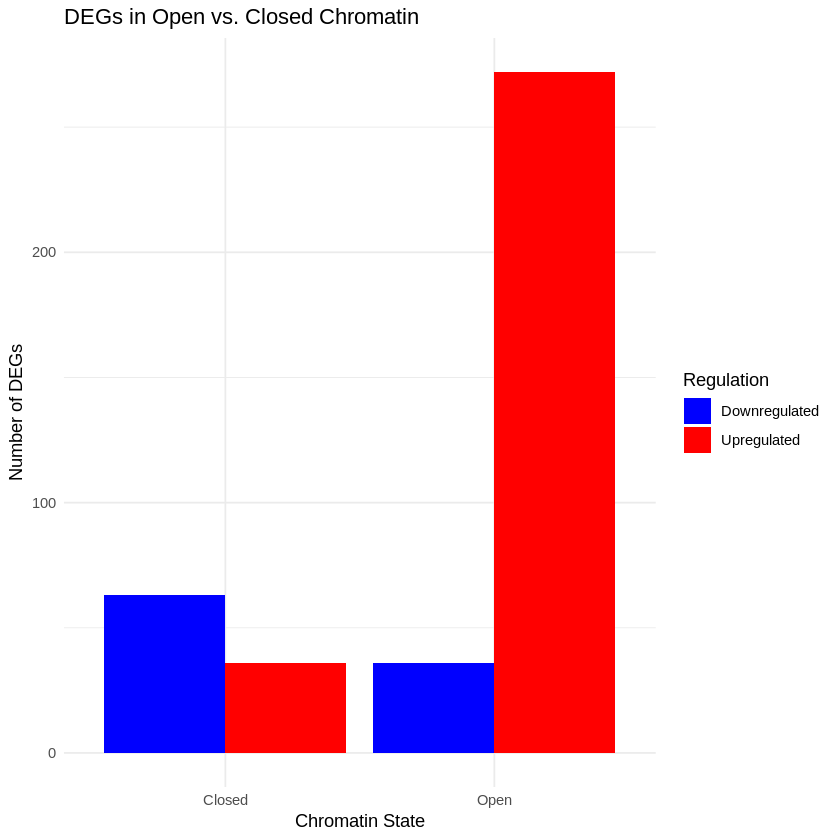

In [ ]:
# Create a data frame for plotting
deg_counts <- data.frame(
  Chromatin_State = c("Open", "Open", "Closed", "Closed"),
  Regulation = c("Upregulated", "Downregulated", "Upregulated", "Downregulated"),
  Count = c(272, 36, 36, 63)
)

# Plot
ggplot(deg_counts, aes(x=Chromatin_State, y=Count, fill=Regulation)) +
  geom_bar(stat="identity", position="dodge") +
  scale_fill_manual(values=c("Upregulated"="red", "Downregulated"="blue")) +
  labs(title="DEGs in Open vs. Closed Chromatin",
       x="Chromatin State",
       y="Number of DEGs") +
  theme_minimal()


In [ ]:
# Save Open Chromatin DEGs
write.table(open_deg$gene_symbol, "Open_Chromatin_DEGs.txt", row.names=FALSE, col.names=FALSE, quote=FALSE)

# Save Closed Chromatin DEGs
write.table(closed_deg$gene_symbol, "Closed_Chromatin_DEGs.txt", row.names=FALSE, col.names=FALSE, quote=FALSE)


In [ ]:
# Load required packages
library(chipenrich)


##Polyenrich in integrated data ##

In [ ]:
# Convert Open and Closed Chromatin DEGs to BED format
open_peaks_df <- data.frame(seqnames=open_deg$seqnames,
                            start=open_deg$start,
                            end=open_deg$end)

closed_peaks_df <- data.frame(seqnames=closed_deg$seqnames,
                              start=closed_deg$start,
                              end=closed_deg$end)

# Save for ChIP-Enrich input
write.table(open_peaks_df, "Updated_Open_Chromatin_Peaks.bed", sep="\t", quote=FALSE, row.names=FALSE, col.names=FALSE)
write.table(closed_peaks_df, "Updated_Closed_Chromatin_Peaks.bed", sep="\t", quote=FALSE, row.names=FALSE, col.names=FALSE)


In [ ]:
# Load required packages
library(chipenrich)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)


In [ ]:

# Define genome and gene annotation
txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene


In [ ]:
# Run ChIP-Enrich for Open Chromatin Peaks
open_enrich <- chipenrich(peaks="Updated_Open_Chromatin_Peaks.bed",
                          genome="hg38",
                          genesets="GOBP",
                          locusdef="nearest_tss",
                          out_name="Updated_Open_Chromatin_Enrichment")

Reading peaks from Updated_Open_Chromatin_Peaks.bed

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Wrote results to: /content/Updated_Open_Chromatin_Enrichment_results.tab

Wrote peak-to-gene assignments to: /content/Updated_Open_Chromatin_Enrichment_peaks.tab

Wrote run options/arguments to: /content/Updated_Open_Chromatin_Enrichment_opts.tab

Wrote count of peaks per gene to: /content/Updated_Open_Chromatin_Enrichment_peaks-per-gene.tab

Wrote QC plots to: /content/Updated_Open_Chromatin_Enrichment_qcplots-1.png

Wrote QC plots to: /content/Updated_Open_Chromatin_Enrichment_qcplots-2.png



In [ ]:

# Run ChIP-Enrich for Closed Chromatin Peaks
closed_enrich <- chipenrich(peaks="Updated_Closed_Chromatin_Peaks.bed",
                            genome="hg38",
                            genesets="GOBP",
                            locusdef="nearest_tss",
                            out_name="Updated_Closed_Chromatin_Enrichment")

# View top enriched pathways
head(open_enrich$results)
head(closed_enrich$results)


Reading peaks from Updated_Closed_Chromatin_Peaks.bed

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Wrote results to: /content/Updated_Closed_Chromatin_Enrichment_results.tab

Wrote peak-to-gene assignments to: /content/Updated_Closed_Chromatin_Enrichment_peaks.tab

Wrote run options/arguments to: /content/Updated_Closed_Chromatin_Enrichment_opts.tab

Wrote count of peaks per gene to: /content/Updated_Closed_Chromatin_Enrichment_peaks-per-gene.tab

Wrote QC plots to: /content/Updated_Closed_Chromatin_Enrichment_qcplots-1.png

Wrote QC plots to: /content/Updated_Closed_Chromatin_Enrichment_qcplots-2.png



,Geneset.Type,Geneset.ID,Description,P.value,FDR,Effect,Odds.Ratio,Status,N.Geneset.Genes,N.Geneset.Peak.Genes,Geneset.Avg.Gene.Length,Geneset.Peak.Genes
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,<chr>
1,Gene Ontology Biological Process,GO:0003341,cilium movement,1.513211e-06,0.008430101,1.485129,4.415534,enriched,193,12,131946.53,"361, 25790, 26256, 54777, 55329, 79864, 83659, 89876, 126820, 144406, 159686, 387712"
2,Gene Ontology Biological Process,GO:0009798,axis specification,1.260690e-05,0.035116519,1.661960,5.269631,enriched,96,8,159311.40,"4762, 5080, 6496, 8313, 10736, 23242, 55329, 79971"
3,Gene Ontology Biological Process,GO:0010566,regulation of ketone biosynthetic process,2.632793e-05,0.037037751,2.744006,15.549155,enriched,17,3,93239.76,"653, 27120, 27122"
4,Gene Ontology Biological Process,GO:0046184,aldehyde biosynthetic process,2.659325e-05,0.037037751,2.765345,15.884522,enriched,16,3,101989.19,"653, 27122, 55163"
5,Gene Ontology Biological Process,GO:0021879,forebrain neuron differentiation,6.025416e-05,0.066696904,1.971285,7.179900,enriched,43,5,189123.98,"4808, 5080, 7314, 10716, 64919"
6,Gene Ontology Biological Process,GO:0001578,microtubule bundle formation,7.183296e-05,0.066696904,1.493950,4.454656,enriched,124,8,135214.20,"51673, 54777, 55329, 79864, 89876, 126820, 159686, 344148"


,Geneset.Type,Geneset.ID,Description,P.value,FDR,Effect,Odds.Ratio,Status,N.Geneset.Genes,N.Geneset.Peak.Genes,Geneset.Avg.Gene.Length,Geneset.Peak.Genes
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,<chr>
1,Gene Ontology Biological Process,GO:0002407,dendritic cell chemotaxis,2.025373e-05,0.09844977,3.375970,29.25264,enriched,27,2,89871.7,"3592, 196527"
2,Gene Ontology Biological Process,GO:0032700,negative regulation of interleukin-17 production,3.534366e-05,0.09844977,3.452878,31.59118,enriched,22,2,106537.9,"3592, 7099"
3,Gene Ontology Biological Process,GO:0070431,nucleotide-binding oligomerization domain containing 2 signaling pathway,8.262080e-05,0.11462416,3.367982,29.01991,enriched,16,2,182927.7,"7099, 121260"
4,Gene Ontology Biological Process,GO:0042509,regulation of tyrosine phosphorylation of STAT protein,8.535108e-05,0.11462416,2.477724,11.91411,enriched,82,3,106533.2,"3479, 3592, 22876"
5,Gene Ontology Biological Process,GO:0008344,adult locomotory behavior,1.376339e-04,0.11462416,2.094217,8.11908,enriched,80,4,198491.4,"10752, 2741, 4929, 22876"
6,Gene Ontology Biological Process,GO:0007260,tyrosine phosphorylation of STAT protein,1.576384e-04,0.11462416,2.375279,10.75402,enriched,86,3,109508.9,"3479, 3592, 22876"


In [ ]:
# Convert enrichment results to data frames
open_results <- as.data.frame(open_enrich$results)
closed_results <- as.data.frame(closed_enrich$results)

# Select top pathways for visualization (FDR < 0.1)
open_top <- open_results[open_results$FDR < 0.1, ]
closed_top <- closed_results[closed_results$FDR < 0.1, ]

# Add a column to indicate Open vs. Closed Chromatin
open_top$Type <- "Open"
closed_top$Type <- "Closed"

# Merge both datasets
combined_enrichment <- rbind(open_top, closed_top)

# Check structure
head(combined_enrichment)


,Geneset.Type,Geneset.ID,Description,P.value,FDR,Effect,Odds.Ratio,Status,N.Geneset.Genes,N.Geneset.Peak.Genes,Geneset.Avg.Gene.Length,Geneset.Peak.Genes,Type
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>
1,Gene Ontology Biological Process,GO:0003341,cilium movement,1.513211e-06,0.008430101,1.485129,4.415534,enriched,193,12,131946.53,"361, 25790, 26256, 54777, 55329, 79864, 83659, 89876, 126820, 144406, 159686, 387712",Open
2,Gene Ontology Biological Process,GO:0009798,axis specification,1.260690e-05,0.035116519,1.661960,5.269631,enriched,96,8,159311.40,"4762, 5080, 6496, 8313, 10736, 23242, 55329, 79971",Open
3,Gene Ontology Biological Process,GO:0010566,regulation of ketone biosynthetic process,2.632793e-05,0.037037751,2.744006,15.549155,enriched,17,3,93239.76,"653, 27120, 27122",Open
4,Gene Ontology Biological Process,GO:0046184,aldehyde biosynthetic process,2.659325e-05,0.037037751,2.765345,15.884522,enriched,16,3,101989.19,"653, 27122, 55163",Open
5,Gene Ontology Biological Process,GO:0021879,forebrain neuron differentiation,6.025416e-05,0.066696904,1.971285,7.179900,enriched,43,5,189123.98,"4808, 5080, 7314, 10716, 64919",Open
6,Gene Ontology Biological Process,GO:0001578,microtubule bundle formation,7.183296e-05,0.066696904,1.493950,4.454656,enriched,124,8,135214.20,"51673, 54777, 55329, 79864, 89876, 126820, 159686, 344148",Open


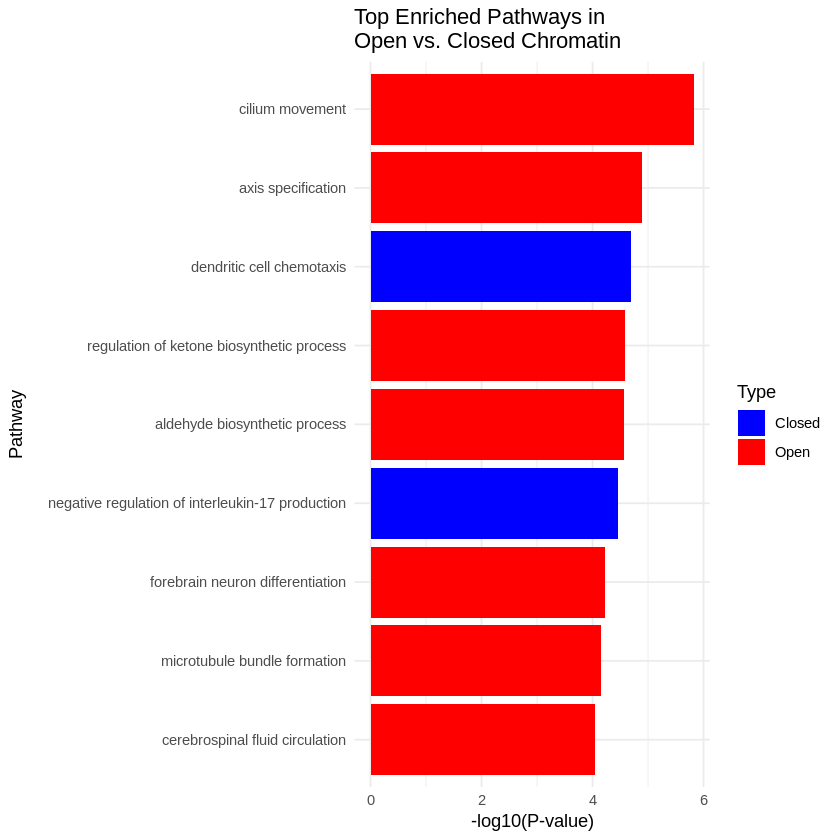

In [ ]:
# Load ggplot2 for visualization
library(ggplot2)

# Plot
ggplot(combined_enrichment, aes(x=reorder(Description, -log10(P.value)),
                                y=-log10(P.value), fill=Type)) +
  geom_bar(stat="identity", position="dodge") +
  coord_flip() +
  labs(title="Top Enriched Pathways in\nOpen vs. Closed Chromatin",
       x="Pathway",
       y="-log10(P-value)") +
  scale_fill_manual(values=c("Open"="red", "Closed"="blue")) +
  theme_minimal()


In [ ]:
# Load required libraries
library(pheatmap)


In [ ]:
print(top_open_genes)
print(top_closed_genes)


 [1] "361"    "25790"  "26256"  "54777"  "55329"  "79864"  "83659"  "89876" 
 [9] "126820" "144406" "159686" "387712" "4762"   "5080"   "6496"   "8313"  
[17] "10736"  "23242"  "79971"  "653"    "27120"  "27122"  "55163"  "4808"  
[25] "7314"   "10716"  "64919"  "51673"  "344148" "10215"  "25925"  "116448"
[33] "4781"   "59"     "857"    "1030"   "3958"   "4255"   "4825"   "5420"  
[41] "5915"   "5920"   "7082"   "8796"   "11167"  "27152"  "57493"  "57619" 
[49] "80274"  "81575"  "135228"
 [1] "3592"   "196527" "7099"   "121260" "3479"   "22876"  "10752"  "2741"  
 [9] "4929"   "8321"   "781"   


In [ ]:
print(dim(open_deg_expr))
print(dim(closed_deg_expr))


[1] 0 2
[1] 0 2


In [ ]:
# Extract genes from top 10 enriched pathways, making sure they exist
top_open_genes <- unique(unlist(strsplit(na.omit(open_enrich$results$Geneset.Peak.Genes[1:10]), ", ")))
top_closed_genes <- unique(unlist(strsplit(na.omit(closed_enrich$results$Geneset.Peak.Genes[1:10]), ", ")))

# Remove empty strings if any
top_open_genes <- top_open_genes[top_open_genes != ""]
top_closed_genes <- top_closed_genes[top_closed_genes != ""]

# Print length to check if there are enough genes
cat("Open Chromatin Genes:", length(top_open_genes), "\n")
cat("Closed Chromatin Genes:", length(top_closed_genes), "\n")


Open Chromatin Genes: 51 
Closed Chromatin Genes: 11 


In [ ]:

# Extract genes from enriched pathways (top 10 pathways for each)
top_open_genes <- unique(unlist(strsplit(open_enrich$results$Geneset.Peak.Genes[1:10], ", ")))
top_closed_genes <- unique(unlist(strsplit(closed_enrich$results$Geneset.Peak.Genes[1:10], ", ")))

# Subset the RNA-seq data for these genes
open_deg_expr <- rna_seq[rna_seq$gene_symbol %in% top_open_genes, c("gene_symbol", "log2FoldChange")]
closed_deg_expr <- rna_seq[rna_seq$gene_symbol %in% top_closed_genes, c("gene_symbol", "log2FoldChange")]

# Combine both datasets
combined_expr <- merge(open_deg_expr, closed_deg_expr, by="gene_symbol", all=TRUE)
rownames(combined_expr) <- combined_expr$gene_symbol
combined_expr <- combined_expr[, -1] # Remove gene_symbol column

# Convert to matrix
expr_matrix <- as.matrix(combined_expr)

# Generate Heatmap
pheatmap(expr_matrix,
         color=colorRampPalette(c("blue", "white", "red"))(50),
         cluster_rows=TRUE,
         cluster_cols=TRUE,
         show_rownames=TRUE,
         show_colnames=TRUE,
         main="Expression of Genes in Enriched Pathways (Open vs. Closed Chromatin)")


ERROR: Error in `$<-.data.frame`(`*tmp*`, Type, value = "Open"): replacement has 1 row, data has 0


In [ ]:
# Extract genes for Open Chromatin pathways
open_pathway_genes <- open_enrich$results[, c("Description", "Geneset.Peak.Genes")]
open_pathway_genes <- open_pathway_genes[open_pathway_genes$FDR < 0.1, ]  # Keep significant pathways

# Extract genes for Closed Chromatin pathways
closed_pathway_genes <- closed_enrich$results[, c("Description", "Geneset.Peak.Genes")]
closed_pathway_genes <- closed_pathway_genes[closed_pathway_genes$FDR < 0.1, ]  # Keep significant pathways

# Print results
print("Genes contributing to Open Chromatin Enriched Pathways:")
print(open_pathway_genes)

print("Genes contributing to Closed Chromatin Enriched Pathways:")
print(closed_pathway_genes)

# Save to files
write.csv(open_pathway_genes, "Open_Chromatin_Pathway_Genes.csv", row.names=FALSE)
write.csv(closed_pathway_genes, "Closed_Chromatin_Pathway_Genes.csv", row.names=FALSE)


ERROR: Error in parse(text = input): <text>:1:7: unexpected 'in'
1: Error in
          ^


In [ ]:
# Check how many of the enriched genes exist in the RNA-seq dataset
sum(top_open_genes %in% rna_seq$gene_symbol)
sum(top_closed_genes %in% rna_seq$gene_symbol)


[1] 0

[1] 0

###Polyenrich###

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("chipenrich")
library(chipenrich)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.3 (2025-02-28)

Installing package(s) 'BiocVersion', 'chipenrich'

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘matrixStats’, ‘abind’, ‘SparseArray’, ‘zoo’, ‘futile.logger’, ‘snow’, ‘BH’, ‘MatrixGenerics’, ‘S4Arrays’, ‘DelayedArray’, ‘plogr’, ‘deldir’, ‘RcppEigen’, ‘gridExtra’, ‘viridis’, ‘Formula’, ‘MatrixModels’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘checkmate’, ‘bitops’, ‘BiocParallel’, ‘Rhtslib’, ‘SummarizedExperiment’, ‘RCurl’, ‘rjson’, ‘Biobase’, ‘RSQLite’, ‘KEGGREST’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘XVector’, ‘png’, ‘jpeg’, ‘interp’, ‘Hmisc’, ‘quantreg’, ‘SparseM’, ‘polspline’, ‘multcomp’, ‘htmlTable’, ‘XML’, ‘Biostrings’, ‘

In [ ]:
# Convert Open and Closed chromatin GRanges to BED-like format
open_peaks_df <- data.frame(seqnames=seqnames(open_peaks),
                            start=start(open_peaks),
                            end=end(open_peaks))

closed_peaks_df <- data.frame(seqnames=seqnames(closed_peaks),
                              start=start(closed_peaks),
                              end=end(closed_peaks))

# Save for reference
write.table(open_peaks_df, "Updated_Open_Chromatin_Peaks.bed", sep="\t", quote=FALSE, row.names=FALSE, col.names=FALSE)
write.table(closed_peaks_df, "Updated_Closed_Chromatin_Peaks.bed", sep="\t", quote=FALSE, row.names=FALSE, col.names=FALSE)


In [ ]:
# Load required libraries
library(chipenrich)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)


In [ ]:

# Define the TxDb for enrichment (hg38)
txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene

# Run chipenrich for Open Chromatin
open_enrich <- chipenrich(peaks=open_peaks_df, genome="hg38", genesets="GOBP", locusdef="nearest_tss", out_name="Open_Chromatin_Enrichment")

# Run chipenrich for Closed Chromatin
closed_enrich <- chipenrich(peaks=closed_peaks_df, genome="hg38", genesets="GOBP", locusdef="nearest_tss", out_name="Closed_Chromatin_Enrichment")


Reading peaks from data.frame...

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Wrote results to: /content/Open_Chromatin_Enrichment_results.tab

Wrote peak-to-gene assignments to: /content/Open_Chromatin_Enrichment_peaks.tab

Wrote run options/arguments to: /content/Open_Chromatin_Enrichment_opts.tab

Wrote count of peaks per gene to: /content/Open_Chromatin_Enrichment_peaks-per-gene.tab

Wrote QC plots to: /content/Open_Chromatin_Enrichment_qcplots-1.png

Wrote QC plots to: /content/Open_Chromatin_Enrichment_qcplots-2.png

Reading peaks from data.frame...

Assigning peaks to genes with assign_peaks(...) ..

Test: ChIP-Enrich

Genesets: Gene Ontology Biological Process

Running tests..

Wrote results to: /content/Closed_Chromatin_Enrichment_results.tab

Wrote peak-to-gene assignments to: /content/Closed_Chromatin_Enrichment_peaks.tab

Wrote run options/arguments to: /content/Closed_Chromatin_Enrichme

In [ ]:
# Load ggplot2 for visualization
library(ggplot2)


In [ ]:
open_results <- as.data.frame(open_enrich$results)
closed_results <- as.data.frame(closed_enrich$results)

In [ ]:
closed_results

,Geneset.Type,Geneset.ID,Description,P.value,FDR,Effect,Odds.Ratio,Status,N.Geneset.Genes,N.Geneset.Peak.Genes,Geneset.Avg.Gene.Length,Geneset.Peak.Genes
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,<chr>
1,Gene Ontology Biological Process,GO:0043576,regulation of respiratory gaseous exchange,0.0001136539,0.4584340,2.1190030,8.322835,enriched,24,8,145594.33,"4829, 5090, 57616, 79068, 2741, 2744, 4929, 30012"
2,Gene Ontology Biological Process,GO:0044065,regulation of respiratory system process,0.0001645787,0.4584340,2.4462327,11.544772,enriched,15,6,144404.80,"5090, 57616, 79068, 2741, 2744, 30012"
3,Gene Ontology Biological Process,GO:0002407,dendritic cell chemotaxis,0.0005832806,0.9410139,1.9137768,6.778642,enriched,27,6,89871.70,"3592, 1235, 5294, 7852, 8995, 196527"
4,Gene Ontology Biological Process,GO:0051930,regulation of sensory perception of pain,0.0008445646,0.9410139,1.5095422,4.524659,enriched,36,9,122010.83,"1910, 4986, 4988, 5024, 7432, 29909, 55273, 56923, 151647"
5,Gene Ontology Biological Process,GO:0051931,regulation of sensory perception,0.0008445646,0.9410139,1.5095422,4.524659,enriched,36,9,122010.83,"1910, 4986, 4988, 5024, 7432, 29909, 55273, 56923, 151647"
6,Gene Ontology Biological Process,GO:0042438,melanin biosynthetic process,0.0013057654,0.9907996,1.7654521,5.844214,enriched,24,8,204197.92,"7306, 9693, 1638, 7299, 23596, 23657, 23682, 283652"
7,Gene Ontology Biological Process,GO:0044550,secondary metabolite biosynthetic process,0.0014460400,0.9907996,1.7265796,5.621393,enriched,26,8,190673.23,"7306, 9693, 1638, 7299, 23596, 23657, 23682, 283652"
8,Gene Ontology Biological Process,GO:1903429,regulation of cell maturation,0.0018804938,0.9907996,1.8722759,6.503080,enriched,20,5,93266.75,"1910, 6461, 9928, 53335, 120892"
9,Gene Ontology Biological Process,GO:0044060,regulation of endocrine process,0.0019598069,0.9907996,1.4736119,4.364973,enriched,39,9,120548.59,"1393, 2587, 2697, 3624, 4089, 4986, 5972, 51762, 64111"


In [ ]:
# Filtering criteria:
# 1. FDR < 0.05 (significant pathways)
# 2. Effect > 1.5 (strongly enriched)
# 3. Odds Ratio > 2 (strong association)
# 4. N.Geneset.Peak.Genes > 3 (avoid weak pathways)

filtered_open_results <- open_results[
  open_results$FDR < 0.05 |
  open_results$Effect > 1.5 |
  open_results$Odds.Ratio > 2 |
  open_results$N.Geneset.Peak.Genes > 3,
]

filtered_closed_results <- closed_results[
  closed_results$FDR < 0.05 |
  closed_results$Effect > 1.5 |
  closed_results$Odds.Ratio > 2 |
  closed_results$N.Geneset.Peak.Genes > 3,
]

# Check how many pathways remain after filtering
cat("Filtered Open Chromatin Pathways:", nrow(filtered_open_results), "\n")
cat("Filtered Closed Chromatin Pathways:", nrow(filtered_closed_results), "\n")


Filtered Open Chromatin Pathways: 1552 
Filtered Closed Chromatin Pathways: 1324 


In [ ]:
open_top <- open_results[1:10, ]
closed_top <- closed_results[1:10, ]

In [ ]:
closed_results

,Geneset.Type,Geneset.ID,Description,P.value,FDR,Effect,Odds.Ratio,Status,N.Geneset.Genes,N.Geneset.Peak.Genes,Geneset.Avg.Gene.Length,Geneset.Peak.Genes
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,<chr>
1,Gene Ontology Biological Process,GO:0002407,dendritic cell chemotaxis,2.025373e-05,0.09844977,3.375970,29.252640,enriched,27,2,89871.70,"3592, 196527"
2,Gene Ontology Biological Process,GO:0032700,negative regulation of interleukin-17 production,3.534366e-05,0.09844977,3.452878,31.591184,enriched,22,2,106537.91,"3592, 7099"
3,Gene Ontology Biological Process,GO:0070431,nucleotide-binding oligomerization domain containing 2 signaling pathway,8.262080e-05,0.11462416,3.367982,29.019911,enriched,16,2,182927.69,"7099, 121260"
4,Gene Ontology Biological Process,GO:0042509,regulation of tyrosine phosphorylation of STAT protein,8.535108e-05,0.11462416,2.477724,11.914114,enriched,82,3,106533.20,"3479, 3592, 22876"
5,Gene Ontology Biological Process,GO:0008344,adult locomotory behavior,1.376339e-04,0.11462416,2.094217,8.119080,enriched,80,4,198491.39,"10752, 2741, 4929, 22876"
6,Gene Ontology Biological Process,GO:0007260,tyrosine phosphorylation of STAT protein,1.576384e-04,0.11462416,2.375279,10.754018,enriched,86,3,109508.92,"3479, 3592, 22876"
7,Gene Ontology Biological Process,GO:1904948,midbrain dopaminergic neuron differentiation,1.633055e-04,0.11462416,3.047806,21.069073,enriched,17,2,199153.76,"4929, 8321"
8,Gene Ontology Biological Process,GO:0036336,dendritic cell migration,1.781680e-04,0.11462416,2.900968,18.191744,enriched,34,2,106244.32,"3592, 196527"
9,Gene Ontology Biological Process,GO:0043576,regulation of respiratory gaseous exchange,1.902532e-04,0.11462416,3.009849,20.284341,enriched,24,2,145594.33,"2741, 4929"


In [ ]:
open_top$Type <- "Open"
closed_top$Type <- "Closed"

In [ ]:
combined_enrichment <- rbind(open_top, closed_top)

In [ ]:
combined_enrichment

Geneset.Type,Geneset.ID,Description,P.value,FDR,Effect,Odds.Ratio,Status,N.Geneset.Genes,N.Geneset.Peak.Genes,Geneset.Avg.Gene.Length,Geneset.Peak.Genes,Type
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>
Gene Ontology Biological Process,GO:0022008,neurogenesis,8.091634e-06,0.04507849,0.3154975,1.370941,enriched,1662,466,229692.74,"26053, 57451, 9369, 26047, 53942, 4781, 7025, 9693, 23242, 120114, 2042, 3670, 4684, 5764, 6091, 6585, 1496, 2045, 2066, 5362, 5789, 8321, 9394, 23426, 57689, 89797, 91584, 166614, 167826, 288, 658, 1000, 1501, 1630, 1946, 2737, 3908, 4825, 4978, 5071, 5649, 6660, 9315, 9353, 9723, 23284, 25925, 57520, 57556, 89795, 114788, 152330, 343472, 116, 302, 655, 1009, 1030, 1495, 1996, 2115, 2534, 3400, 3516, 3800, 4548, 5028, 5583, 5793, 5915, 6653, 6695, 7042, 7143, 7399, 7436, 8613, 8828, 9201, 9863, 10215, 10512, 11178, 23026, 23305, 23314, 25814, 26230, 55619, 55714, 57554, 63973, 80031, 84623, 114798, 137970, 157285, 161357, 163404, 389207, 389549, 182, 214, 301, 463, 577, 590, 653, 869, 1002, 1638, 1901, 2043, 2047, 2049, 2120, 2637, 2736, 2895, 3169, 3459, 4124, 4133, 4208, 4685, 4916, 4919, 5015, 5080, 5087, 5274, 5454, 5530, 5587, 5592, 5797, 5800, 5802, 5818, 6092, 6299, 6383, 6496, 6616, 6657, 7099, 7162, 7204, 7852, 8128, 8440, 8829, 8997, 9037, 9760, 10090, 10371, 10505, 10678, 22903, 22999, 23043, 23105, 23114, 23245, 23294, 23376, 23418, 26011, 26037, 27185, 50807, 56288, 56963, 57178, 57611, 58158, 59336, 66000, 80326, 84059, 84871, 89796, 128434, 140578, 221935, 266977, 644943, 238, 274, 351, 460, 473, 491, 547, 558, 596, 627, 654, 815, 818, 1123, 1128, 1203, 1268, 1436, 1464, 1499, 1523, 1600, 1608, 1745, 1808, 1809, 1869, 1889, 1907, 1959, 2019, 2044, 2181, 2185, 2260, 2263, 2309, 2596, 2674, 2823, 2903, 2917, 3226, 3398, 3766, 3909, 3952, 3953, 3975, 3996, 4009, 4082, 4139, 4233, 4311, 4653, 4664, 4673, 4752, 4756, 4762, 4803, 4808, 4854, 4884, 4897, 4902, 4908, 4915, 4929, 4967, 4988, 5121, 5324, 5396, 5457, 5590, 5747, 5787, 5803, 5880, 5923, 6014, 6285, 6347, 6422, 6423, 6456, 6469, 6507, 6547, 6586, 6833, 6857, 7026, 7070, 7074, 7101, 7223, 7248, 7314, 7337, 7401, 7412, 7422, 7424, 7465, 7471, 7472, 7473, 7475, 7476, 7477, 7533, 7804, 7869, 8153, 8320, 8324, 8325, 8326, 8403, 8437, 8499, 8522, 8553, 8578, 8633, 8648, 8842, 8846, 8854, 9139, 9148, 9231, 9241, 9464, 9497, 9576, 9580, 9638, 9639, 9721, 9745, 9751, 10129, 10154, 10160, 10363, 10498, 10611, 10675, 10683, 10716, 10718, 10787, 10806, 10810, 10818, 11020, 11113, 11221, 22850, 22853, 22871, 22876, 22882, 22902, 22906, 23013, 23040, 23072, 23129, 23189, 23316, 23327, 23353, 23380, 23405, 23413, 23440, 23493, 23531, 23566, 23768, 25871, 25942, 26052, 26058, 26227, 26281, 27023, 30819, 50618, 50861, 50863, 50937, 51057, 51176, 51199, 51299, 51761, 53335, 54437, 54549, 54897, 54986, 55107, 55140, 55182, 55502, 55607, 56978, 57142, 57408, 57540, 57626, 57688, 63950, 63974, 64399, 64764, 64919, 79192, 79633, 79659, 79805, 79955, 80045, 80303, 81029, 81544, 84062, 84189, 84258, 84628, 84913, 85407, 85414, 89780, 91653, 92737, 116443, 116448, 117531, 123904, 124842, 124925, 127833, 146760, 153241, 157680, 201191, 203228, 219699, 221496, 222950, 223117, 254778, 256297, 257194, 261734, 285220, 339479, 340371, 345651, 375387, 375567, 387119, 388939, 391723, 407738, 440275, 494470, 653464, 729230, 729920, 100132074",Open
Gene Ontology Biological Process,GO:0021872,forebrain generation of neurons,2.755740e-05,0.06094176,1.4380249,4.212368,enriched,52,24,186416.12,"9693, 166614, 2737, 9723, 8828, 1638, 2637, 5080, 8829, 27185, 57178, 1436, 1745, 2263, 4808, 4967, 7101, 7314, 10716, 23440, 51176, 57688, 64919, 89780",Open
Gene Ontology Biological Process,GO:0001825,blastocyst formation,1.628082e-04,0.10077827,1.3462429,3.842960,enriched,45,16,109513.62,"6670, 23081, 86, 100, 4071, 4242, 4838, 7784, 8320, 8452, 10370, 26469, 57142, 63978, 64321, 166863",Open
Gene Ontology Biological Process,GO:1901018,positive

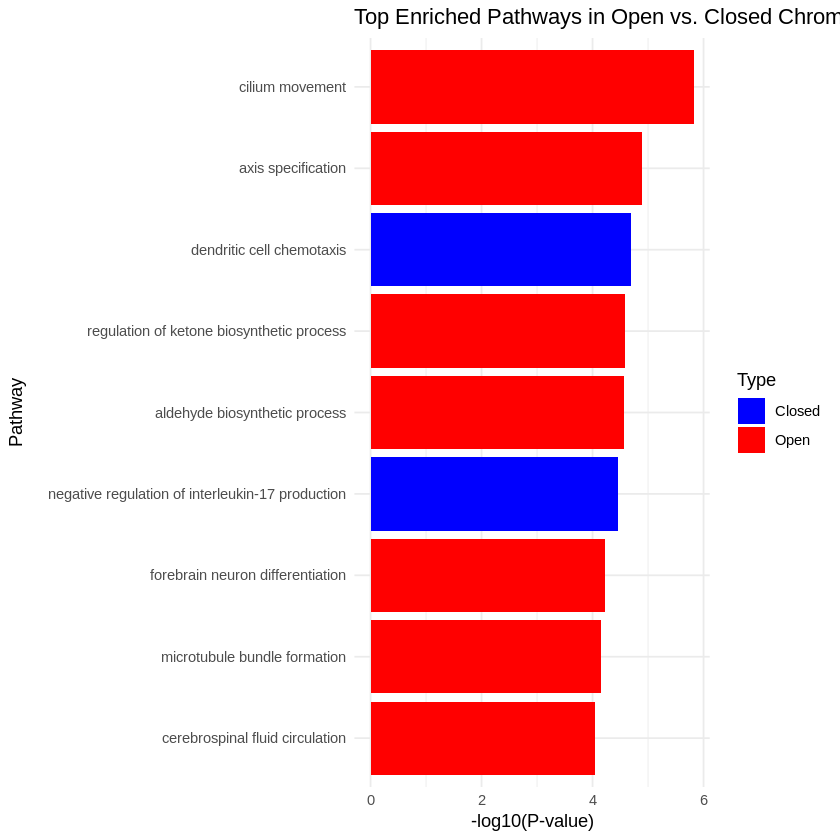

In [ ]:
library(ggplot2)

# Convert P-value to -log10 scale for better visualization
open_top$logP <- -log10(open_top$P.value)
closed_top$logP <- -log10(closed_top$P.value)

# Add a "Type" column to distinguish between Open and Closed pathways
open_top$Type <- "Open"
closed_top$Type <- "Closed"

# Merge both datasets
combined_top <- rbind(open_top, closed_top)

# Create a combined bar plot
ggplot(combined_top, aes(x=reorder(Description, logP), y=logP, fill=Type)) +
  geom_bar(stat="identity", position="dodge") +
  coord_flip() +
  labs(title="Top Enriched Pathways in Open vs. Closed Chromatin",
       x="Pathway",
       y="-log10(P-value)") +
  scale_fill_manual(values=c("Open"="red", "Closed"="blue")) +
  theme_minimal()


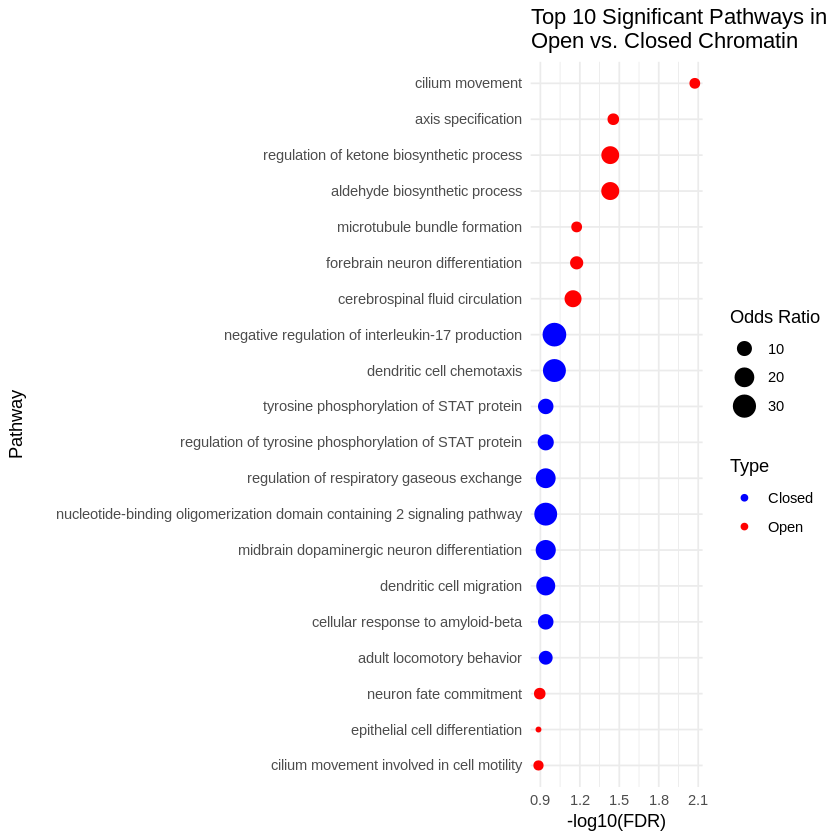

In [ ]:
library(ggplot2)

# Select the top 10 most significant pathways (lowest FDR) for Open and Closed chromatin
top_open <- filtered_open_results[order(filtered_open_results$FDR), ][1:10, ]
top_closed <- filtered_closed_results[order(filtered_closed_results$FDR), ][1:10, ]

# Add a Type column to indicate Open vs. Closed
top_open$Type <- "Open"
top_closed$Type <- "Closed"

# Combine both datasets for plotting
top_pathways <- rbind(top_open, top_closed)

# Create dot plot
ggplot(top_pathways, aes(x = -log10(FDR), y = reorder(Description, -log10(FDR)), color = Type, size = Odds.Ratio)) +
  geom_point() +
  scale_color_manual(values = c("Open" = "red", "Closed" = "blue")) +
  labs(
    title = "Top 10 Significant Pathways in\nOpen vs. Closed Chromatin",
    x = "-log10(FDR)",
    y = "Pathway",
    size = "Odds Ratio"
  ) +
  theme_minimal()

In [ ]:
library(ggplot2)

ggplot(significant_peaks, aes(x = log2FoldChange, y = -log10(padj))) +
  geom_point(alpha = 0.5, color = "gray") +
  geom_point(data = significant_peaks %>% filter(padj < 0.05 & abs(log2FoldChange) > 1),
             aes(x = log2FoldChange, y = -log10(padj)), color = "red") +
  theme_minimal() +
  labs(title = "Volcano Plot of Integrated ATAC-RNA Data",
       x = "log2 Fold Change (RNA-seq)",
       y = "-log10 Adjusted p-value (ATAC-seq)")
#Red points = Significantly differentially accessible peaks linked to significantly differentially expressed genes.
#Upper left/right = Strong changes in expression & accessibility.

In [ ]:
# Distribution of padj values
hist(significant_peaks$padj, breaks = 50, main = "Distribution of Adjusted p-values",
     xlab = "padj", col = "blue")

In [ ]:
significant_peaks <- significant_peaks %>%
  arrange(padj) %>%  # Sort by padj (ascending)
  distinct(ENSEMBL, .keep_all = TRUE)  # Keep only the first occurrence of each ENSEMBL

write_csv(significant_peaks, "/content/Noduplicates_ATAC_RNA_Results.csv")
#no duplicates files

# Count the number of peaks in different annotation categories
table(significant_peaks$annotation)

# Summary of log2FoldChange
summary(significant_peaks$log2FoldChange)

In [ ]:
length(unique(significant_peaks$ENSEMBL))

write_csv(significant_peaks, "/content/Filtered_ATAC_RNA_Results.csv")
#this has duplicates

# Integrate with TF from JASPAR-RNAseq#



In [ ]:
# Load necessary libraries
library(tidyverse)

# Load the files
open_atac_rna <- read_csv("Filtered_Open_Chromatin_Integrated_with_RNAseq.csv")
closed_atac_rna <- read_csv("Filtered_Closed_Chromatin_Integrated_with_RNAseq.csv")
viper_results <- read_csv("viper_tf_activity_results (1).csv")



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 308 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): gene_id, seqnames, strand, gene_symbol, Type
dbl (10): start, end, width, gene_id.y, baseMean, log2FoldChange, lfcSE, sta...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 99 Columns: 15
── Column specification ───────────────────────

Rows: 308
Columns: 15
$ gene_id        <chr> "ENSG00000003147", "ENSG00000007372", "ENSG00000008441"…
$ seqnames       <chr> "chr7", "chr11", "chr19", "chr1", "chr1", "chr1", "chr1…
$ start          <dbl> 8154250, 31797400, 13022520, 171257780, 160115440, 6848…
$ end            <dbl> 8154970, 31801860, 13025510, 171260080, 160118550, 6848…
$ width          <dbl> 721, 4461, 2991, 2301, 3111, 751, 3081, 1361, 1691, 121…
$ strand         <chr> "*", "*", "*", "*", "*", "*", "*", "*", "*", "*", "*", …
$ gene_id.y      <dbl> 3382, 5080, 4784, 2326, 477, 55635, 355, 286, 28990, 26…
$ gene_symbol    <chr> "ICA1", "PAX6", "NFIX", "FMO1", "ATP1A2", "DEPDC1", "FA…
$ baseMean       <dbl> 267.08965, 1306.27765, 41.98554, 14.90645, 317.23668, 2…
$ log2FoldChange <dbl> -1.543965, 4.203292, 2.541504, 4.330007, 6.075508, 2.70…
$ lfcSE          <dbl> 0.19020016, 0.14699240, 0.43249428, 0.94140241, 0.32417…
$ stat           <dbl> -8.117579, 28.595300, 5.876386, 4.599528, 18.741528, 11…
$ pvalue         <

In [ ]:
head(open_atac_rna)

gene_id,seqnames,start,end,width,strand,gene_id.y,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000003147,chr7,8154250,8154970,721,*,3382,ICA1,267.08965,-1.543965,0.1902002,-8.117579,4.76e-16,9.00e-15,Open
ENSG00000007372,chr11,31797400,31801860,4461,*,5080,PAX6,1306.27765,4.203292,0.1469924,28.595300,7.69e-180,1.22e-176,Open
ENSG00000008441,chr19,13022520,13025510,2991,*,4784,NFIX,41.98554,2.541504,0.4324943,5.876386,4.19e-09,4.06e-08,Open
ENSG00000010932,chr1,171257780,171260080,2301,*,2326,FMO1,14.90645,4.330007,0.9414024,4.599528,4.23e-06,2.65e-05,Open
ENSG00000018625,chr1,160115440,160118550,3111,*,477,ATP1A2,317.23668,6.075508,0.3241736,18.741528,2.27e-78,5.56e-76,Open
ENSG00000024526,chr1,68485080,68485830,751,*,55635,DEPDC1,257.04738,2.704732,0.2331168,11.602475,4.00e-31,2.04e-29,Open


In [ ]:
head(closed_atac_rna)


gene_id,seqnames,start,end,width,strand,gene_id.y,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.3819125,-7.515678,5.66e-14,9.07e-13,Closed
ENSG00000039139,chr5,13865254,13866010,757,*,1767,DNAH5,101.2120,1.304340,0.2760298,4.725360,2.30e-06,1.50e-05,Closed
ENSG00000060709,chr12,130714170,130717280,3111,*,23504,RIMBP2,322.4418,-9.011442,0.7370423,-12.226492,2.24e-34,1.33e-32,Closed
ENSG00000066382,chr11,30537100,30538780,1681,*,744,MPPED2,183.2355,-2.539429,0.2585761,-9.820818,9.16e-23,2.92e-21,Closed
ENSG00000071205,chr4,147939500,147941480,1981,*,79658,ARHGAP10,136.0735,-1.556023,0.2393128,-6.502046,7.92e-11,9.31e-10,Closed
ENSG00000072657,chr12,72469770,72470530,761,*,29953,TRHDE,338.2466,-1.168402,0.1810923,-6.451968,1.10e-10,1.28e-09,Closed


In [ ]:
head(viper_results)

TF,Target,Weight
<chr>,<chr>,<dbl>
AHR,CYP1A1,1
AHR,CYP1A2,1
AHR,CYP1B1,1
AHR,FOS,1
AHR,MYC,1
AHR,UGT1A6,1


In [ ]:
colnames(open_atac_rna)
colnames(closed_atac_rna)
colnames(viper_results)


[1] "gene_id"        "seqnames"       "start"          "end"           
 [5] "width"          "strand"         "gene_id.y"      "gene_symbol"   
 [9] "baseMean"       "log2FoldChange" "lfcSE"          "stat"          
[13] "pvalue"         "padj"           "Type"

[1] "gene_id"        "seqnames"       "start"          "end"           
 [5] "width"          "strand"         "gene_id.y"      "gene_symbol"   
 [9] "baseMean"       "log2FoldChange" "lfcSE"          "stat"          
[13] "pvalue"         "padj"           "Type"

[1] "TF"     "Target" "Weight"

In [ ]:
open_tf_integration <- open_atac_rna %>%
  left_join(viper_results, by = c("gene_symbol" = "Target"))


In [ ]:
closed_tf_integration <- closed_atac_rna %>%
  left_join(viper_results, by = c("gene_symbol" = "Target"))

In [ ]:
open_tf_integration <- open_tf_integration %>%
  drop_na(TF, Weight)

closed_tf_integration <- closed_tf_integration %>%
  drop_na(TF, Weight)


In [ ]:
#520 (drop NA = 326)
open_tf_integration

gene_id,seqnames,start,end,width,strand,gene_id.y,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Type,TF,Weight,Regulation
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
ENSG00000007372,chr11,31797400,31801860,4461,*,5080,PAX6,1306.27765,4.203292,0.1469924,28.595300,7.69000e-180,1.2200e-176,Open,SP1,1,Upregulated
ENSG00000008441,chr19,13022520,13025510,2991,*,4784,NFIX,41.98554,2.541504,0.4324943,5.876386,4.19000e-09,4.0600e-08,Open,IRF2,1,Upregulated
ENSG00000008441,chr19,13022520,13025510,2991,*,4784,NFIX,41.98554,2.541504,0.4324943,5.876386,4.19000e-09,4.0600e-08,Open,PRDM1,1,Upregulated
ENSG00000008441,chr19,13022520,13025510,2991,*,4784,NFIX,41.98554,2.541504,0.4324943,5.876386,4.19000e-09,4.0600e-08,Open,ZNF384,1,Upregulated
ENSG00000008441,chr19,13022520,13025510,2991,*,4784,NFIX,41.98554,2.541504,0.4324943,5.876386,4.19000e-09,4.0600e-08,Open,ZNF263,-1,Upregulated
ENSG00000018625,chr1,160115440,160118550,3111,*,477,ATP1A2,317.23668,6.075508,0.3241736,18.741528,2.27000e-78,5.5600e-76,Open,MYC,1,Upregulated
ENSG00000026103,chr10,88950810,88953890,3081,*,355,FAS,171.65578,1.741542,0.2832388,6.148669,7.81000e-10,8.2600e-09,Open,CEBPA,1,Upregulated
ENSG00000026103,chr10,88950810,88953890,3081,*,355,FAS,171.65578,1.741542,0.2832388,6.148669,7.81000e-10,8.2600e-09,Open,ETS1,1,Upregulated
ENSG00000026103,chr10,88950810,88953890,3081,*,355,FAS,171.65578,1.741542,0.2832388,6.148669,7.81000e-10,8.2600e-09,Open,FOS,1,Upregulated


In [ ]:
if (!requireNamespace("patchwork", quietly = TRUE)) {
  install.packages("patchwork")
}
# Load the patchwork library
library(patchwork)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



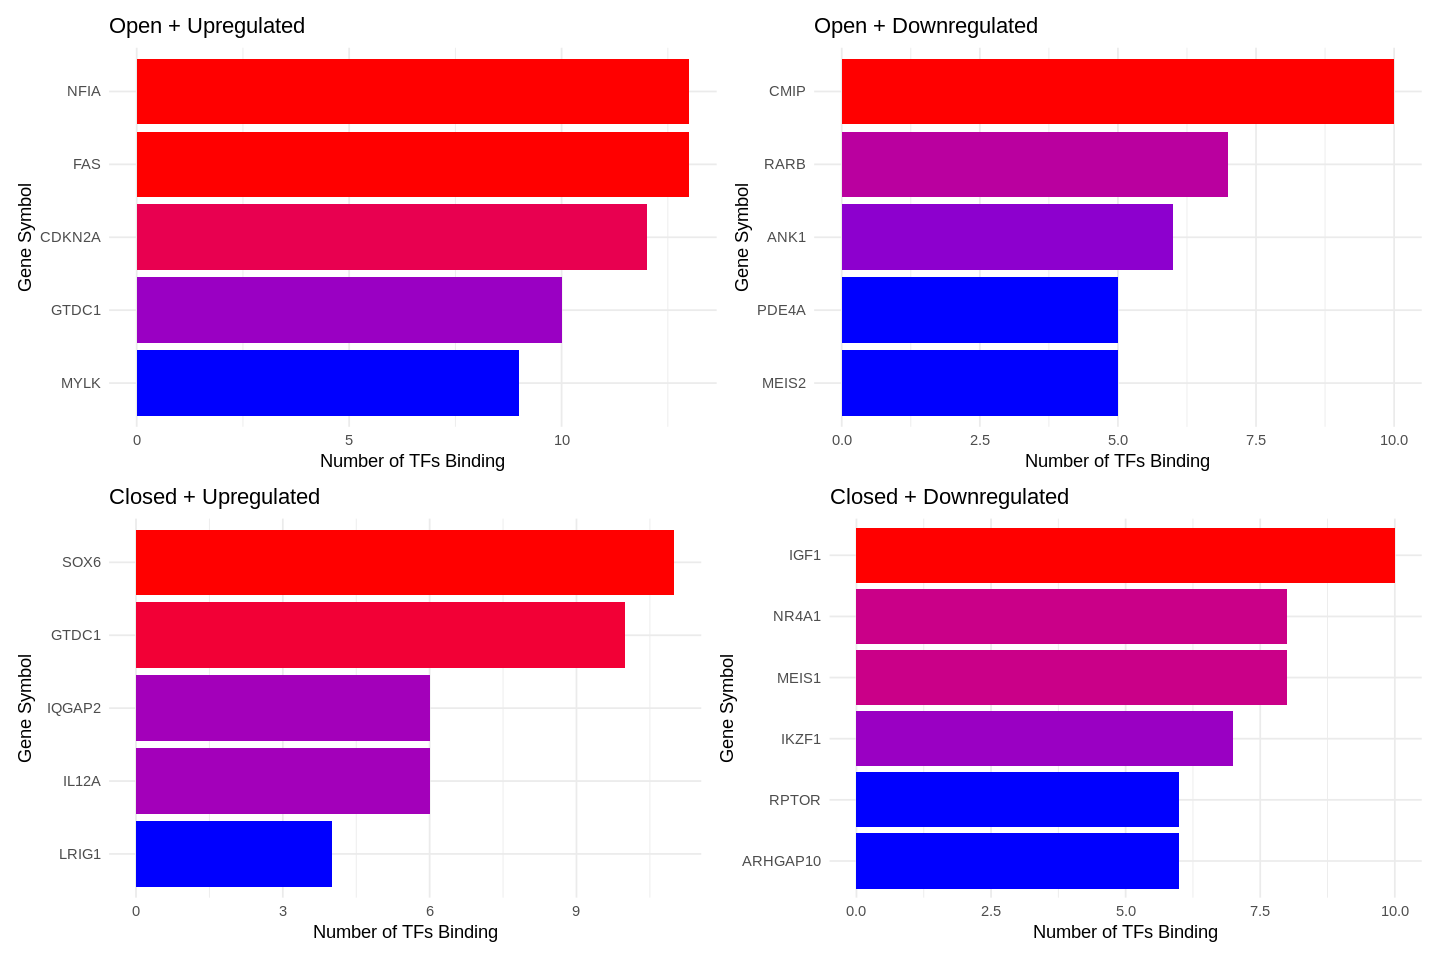

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(patchwork)  # For combining multiple plots

# Function to get top 5 genes with the most TFs for a specific condition
get_top_genes <- function(data, chromatin_state, regulation_status) {
  data %>%
    filter(Type == chromatin_state, Regulation == regulation_status) %>%
    count(gene_symbol, sort = TRUE) %>%
    top_n(5, n)  # Select top 5 genes
}

# Get the top genes for each condition
top_open_up <- get_top_genes(open_tf_integration, "Open", "Upregulated")
top_open_down <- get_top_genes(open_tf_integration, "Open", "Downregulated")
top_closed_up <- get_top_genes(closed_tf_integration, "Closed", "Upregulated")
top_closed_down <- get_top_genes(closed_tf_integration, "Closed", "Downregulated")

# Function to create a bar plot
plot_tf_binding <- function(data, title) {
  ggplot(data, aes(x = reorder(gene_symbol, n), y = n, fill = n)) +
    geom_bar(stat = "identity") +
    coord_flip() +
    scale_fill_gradient(low = "blue", high = "red") +
    theme_minimal() +
    labs(title = title, x = "Gene Symbol", y = "Number of TFs Binding") +
    theme(legend.position = "none")
}
# Generate the four plots
p1 <- plot_tf_binding(top_open_up, "Open + Upregulated")
p2 <- plot_tf_binding(top_open_down, "Open + Downregulated")
p3 <- plot_tf_binding(top_closed_up, "Closed + Upregulated")
p4 <- plot_tf_binding(top_closed_down, "Closed + Downregulated")

# Combine all four plots into a single figure
final_plot <- (p1 | p2) / (p3 | p4)
final_plot

In [ ]:
#191 (drop NA = 131)
closed_tf_integration

gene_id,seqnames,start,end,width,strand,gene_id.y,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Type,TF,Weight
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,ATF7,1
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,CEBPA,1
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,ESR1,1
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,HNF1A,1
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,JUN,1
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,STAT1,1
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,STAT3,1
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,STAT5A,1
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,STAT5B,1


In [ ]:
write_csv(open_tf_integration, "Open_TF_Integrated_Cleaned.csv")
write_csv(closed_tf_integration, "Closed_TF_Integrated_Cleaned.csv")


In [ ]:
install.packages("ggrepel")  # Install the ggrepel package
library(ggrepel)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(ggrepel)


In [ ]:
library(dplyr)
library(knitr)

# Filter significant genes (padj < 0.05) and arrange by log2FoldChange
top_genes_tfs <- open_tf_integration %>%
  filter(padj < 0.05) %>%
  group_by(gene_symbol) %>%
  summarise(
    TFs = paste(unique(TF), collapse = ", "),  # Concatenate TFs per gene
    log2FoldChange = mean(log2FoldChange),     # Average log2FC
    Regulation = unique(Regulation)            # Keep regulation info
  ) %>%
  arrange(desc(abs(log2FoldChange)))  # Sort by most differentially expressed genes

# Display as a table
kable(head(top_genes_tfs, 10))  # Show top 10 significant genes




|gene_symbol |TFs                      | log2FoldChange|Regulation  |
|:-----------|:------------------------|--------------:|:-----------|
|ATP1A2      |MYC                      |       6.075508|Upregulated |
|C1QTNF5     |HNF4A                    |       5.533376|Upregulated |
|MGMT        |TP53                     |       5.120084|Upregulated |
|NHLH2       |TP53                     |       5.106524|Upregulated |
|RNF43       |ELF3, HNF4G              |       5.087822|Upregulated |
|ME1         |BACH1                    |       5.054243|Upregulated |
|SLC15A2     |GATA6                    |       5.007974|Upregulated |
|VCAM1       |JUN, NFKB1, RELA, POU2F1 |       4.757835|Upregulated |
|LGALS3      |KLF5, RUNX1, RUNX2       |       4.549913|Upregulated |
|PDGFRA      |E2F7, SOX10              |       4.520205|Upregulated |

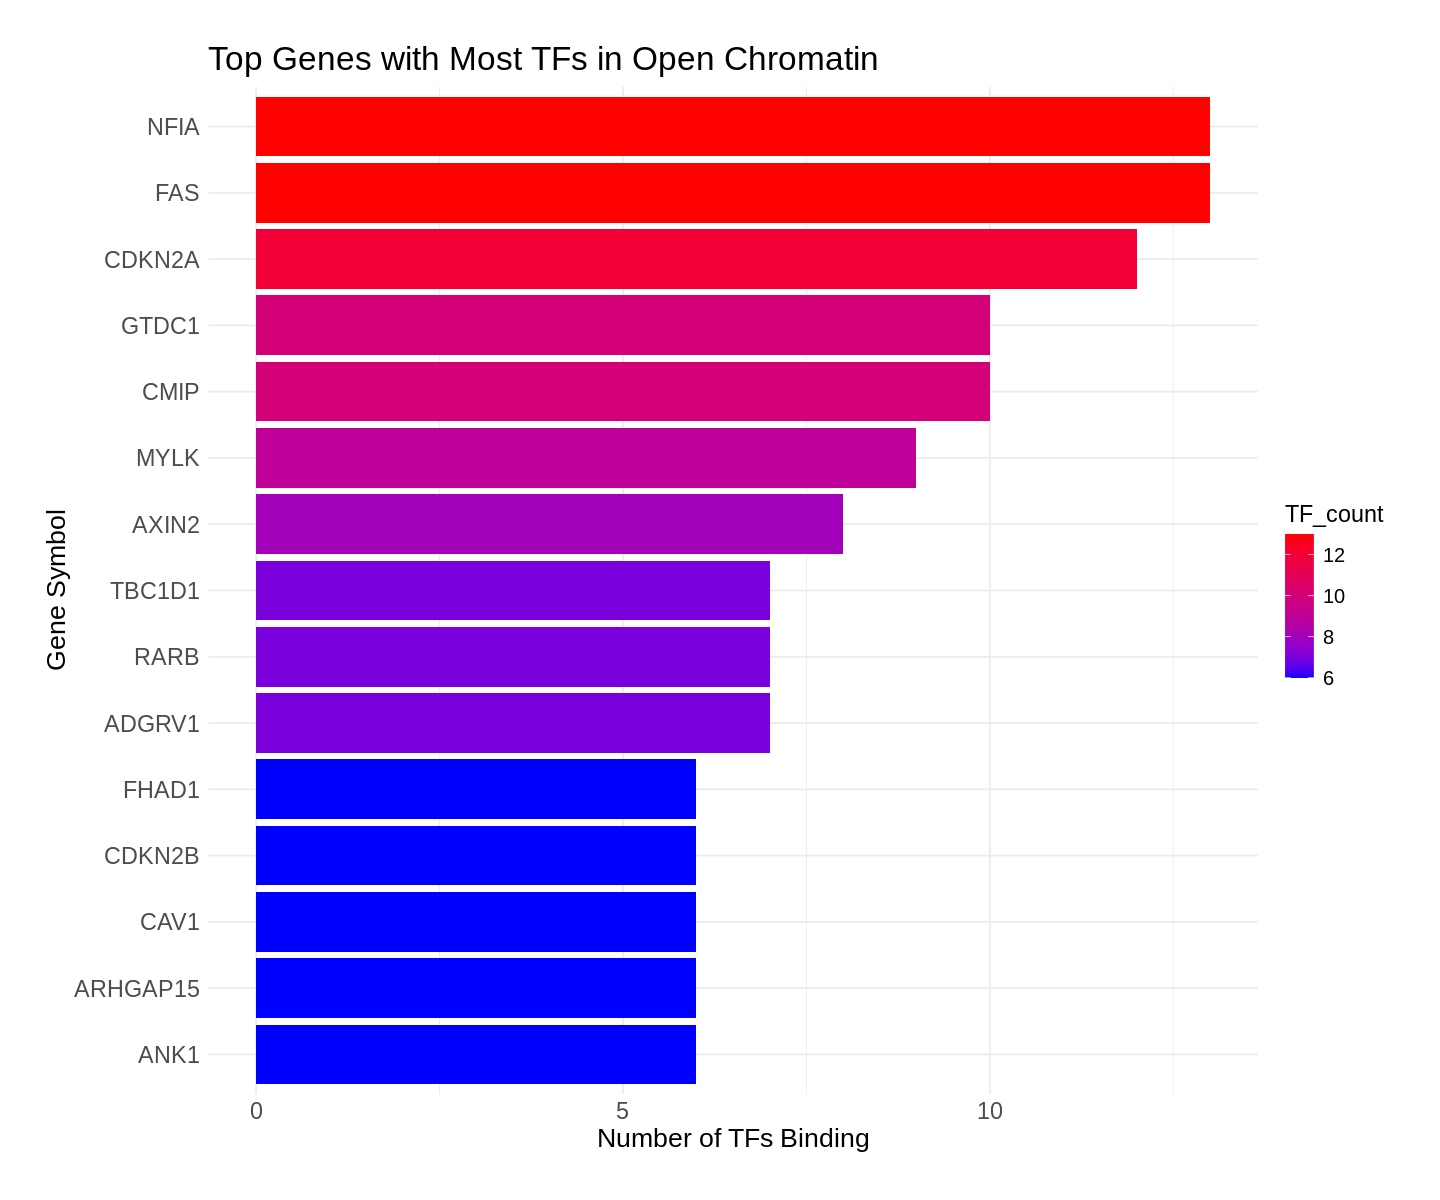

In [ ]:
library(ggplot2)

# Count number of TFs per gene
tf_count_per_gene <- open_tf_integration %>%
  filter(padj < 0.05) %>%
  group_by(gene_symbol) %>%
  summarise(TF_count = n()) %>%
  arrange(desc(TF_count))

# Plot top 15 genes with most TFs
ggplot(head(tf_count_per_gene, 15), aes(x = reorder(gene_symbol, TF_count), y = TF_count, fill = TF_count)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(title = "Top Genes with Most TFs in Open Chromatin",
       x = "Gene Symbol",
       y = "Number of TFs Binding") +
  theme_minimal()+
  theme(
    plot.title = element_text(size = 20),  # Increase title size
    axis.title = element_text(size = 16),  # Increase axis title size
    axis.text = element_text(size = 14),    # Increase axis text size
    legend.title = element_text(size = 14), # Increase legend title size
    legend.text = element_text(size = 12)   # Increase legend text size
  ) +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))  # Adjust margins if needed



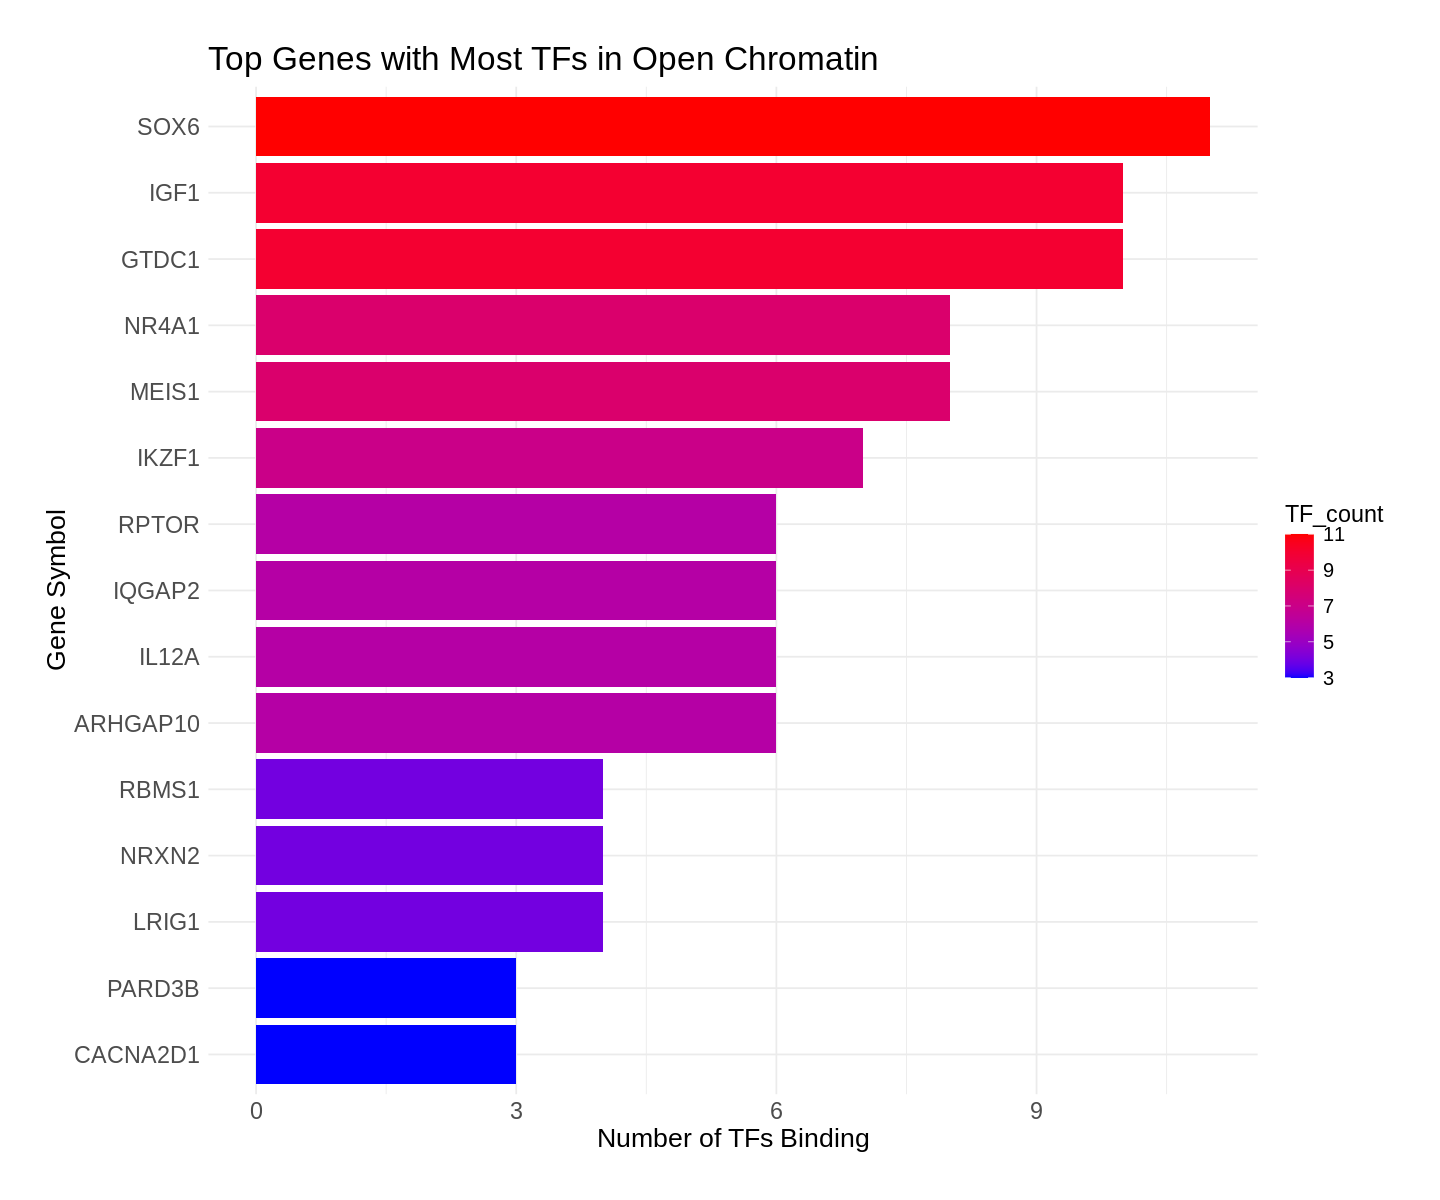

In [ ]:
library(ggplot2)

# Count number of TFs per gene
tf_count_per_gene <- closed_tf_integration %>%
  filter(padj < 0.05) %>%
  group_by(gene_symbol) %>%
  summarise(TF_count = n()) %>%
  arrange(desc(TF_count))

# Plot top 15 genes with most TFs
ggplot(head(tf_count_per_gene, 15), aes(x = reorder(gene_symbol, TF_count), y = TF_count, fill = TF_count)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(title = "Top Genes with Most TFs in Open Chromatin",
       x = "Gene Symbol",
       y = "Number of TFs Binding") +
  theme_minimal()+
  theme(
    plot.title = element_text(size = 20),  # Increase title size
    axis.title = element_text(size = 16),  # Increase axis title size
    axis.text = element_text(size = 14),    # Increase axis text size
    legend.title = element_text(size = 14), # Increase legend title size
    legend.text = element_text(size = 12)   # Increase legend text size
  ) +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))  # Adjust margins if needed



In [ ]:
# Extract unique TFs from open and closed datasets
unique_tfs_open <- unique(open_tf_integration$TF)
unique_tfs_closed <- unique(closed_tf_integration$TF)

# Combine both sets of TFs
all_unique_tfs <- unique(c(unique_tfs_open, unique_tfs_closed))

# Convert to a data frame for STRINGdb input
tfs_for_stringdb <- data.frame(TF = all_unique_tfs)

# Save to CSV for uploading to STRINGdb
write.csv(tfs_for_stringdb, "TFs_for_STRINGdb.csv", row.names = FALSE)


In [ ]:
# Extract unique TFs from Open Chromatin
unique_tfs_open <- unique(open_tf_integration$TF)
tfs_for_stringdb_open <- data.frame(TF = unique_tfs_open)

# Extract unique TFs from Closed Chromatin
unique_tfs_closed <- unique(closed_tf_integration$TF)
tfs_for_stringdb_closed <- data.frame(TF = unique_tfs_closed)

# Save as CSV for STRINGdb
write.csv(tfs_for_stringdb_open, "TFs_for_STRINGdb_Open.csv", row.names = FALSE)
write.csv(tfs_for_stringdb_closed, "TFs_for_STRINGdb_Closed.csv", row.names = FALSE)


In [ ]:
library(ggplot2)
library(dplyr)


In [ ]:
head(closed_atac_rna)
head(open_atac_rna)

gene_id,seqnames,start,end,width,strand,gene_id.y,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.3819125,-7.515678,5.66e-14,9.07e-13,Closed
ENSG00000039139,chr5,13865254,13866010,757,*,1767,DNAH5,101.2120,1.304340,0.2760298,4.725360,2.30e-06,1.50e-05,Closed
ENSG00000060709,chr12,130714170,130717280,3111,*,23504,RIMBP2,322.4418,-9.011442,0.7370423,-12.226492,2.24e-34,1.33e-32,Closed
ENSG00000066382,chr11,30537100,30538780,1681,*,744,MPPED2,183.2355,-2.539429,0.2585761,-9.820818,9.16e-23,2.92e-21,Closed
ENSG00000071205,chr4,147939500,147941480,1981,*,79658,ARHGAP10,136.0735,-1.556023,0.2393128,-6.502046,7.92e-11,9.31e-10,Closed
ENSG00000072657,chr12,72469770,72470530,761,*,29953,TRHDE,338.2466,-1.168402,0.1810923,-6.451968,1.10e-10,1.28e-09,Closed


gene_id,seqnames,start,end,width,strand,gene_id.y,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000003147,chr7,8154250,8154970,721,*,3382,ICA1,267.08965,-1.543965,0.1902002,-8.117579,4.76e-16,9.00e-15,Open
ENSG00000007372,chr11,31797400,31801860,4461,*,5080,PAX6,1306.27765,4.203292,0.1469924,28.595300,7.69e-180,1.22e-176,Open
ENSG00000008441,chr19,13022520,13025510,2991,*,4784,NFIX,41.98554,2.541504,0.4324943,5.876386,4.19e-09,4.06e-08,Open
ENSG00000010932,chr1,171257780,171260080,2301,*,2326,FMO1,14.90645,4.330007,0.9414024,4.599528,4.23e-06,2.65e-05,Open
ENSG00000018625,chr1,160115440,160118550,3111,*,477,ATP1A2,317.23668,6.075508,0.3241736,18.741528,2.27e-78,5.56e-76,Open
ENSG00000024526,chr1,68485080,68485830,751,*,55635,DEPDC1,257.04738,2.704732,0.2331168,11.602475,4.00e-31,2.04e-29,Open


In [ ]:
library(ggplot2)
library(dplyr)
library(ggrepel)

In [ ]:
combined_atac_rna

gene_id,seqnames,start,end,width,strand,gene_id.y,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000003147,chr7,8154250,8154970,721,*,3382,ICA1,267.08965,-1.543965,0.19020016,-8.117579,4.760000e-16,9.000000e-15,Open
ENSG00000007372,chr11,31797400,31801860,4461,*,5080,PAX6,1306.27765,4.203292,0.14699240,28.595300,7.690000e-180,1.220000e-176,Open
ENSG00000008441,chr19,13022520,13025510,2991,*,4784,NFIX,41.98554,2.541504,0.43249428,5.876386,4.190000e-09,4.060000e-08,Open
ENSG00000010932,chr1,171257780,171260080,2301,*,2326,FMO1,14.90645,4.330007,0.94140241,4.599528,4.230000e-06,2.650000e-05,Open
ENSG00000018625,chr1,160115440,160118550,3111,*,477,ATP1A2,317.23668,6.075508,0.32417356,18.741528,2.270000e-78,5.560000e-76,Open
ENSG00000024526,chr1,68485080,68485830,751,*,55635,DEPDC1,257.04738,2.704732,0.23311681,11.602475,4.000000e-31,2.040000e-29,Open
ENSG00000026103,chr10,88950810,88953890,3081,*,355,FAS,171.65578,1.741542,0.28323878,6.148669,7.810000e-10,8.260000e-09,Open
ENSG00000029534,chr8,41745530,41746890,1361,*,286,ANK1,111.80638,-1.408006,0.36652312,-3.841521,1.222740e-04,5.755100e-04,Open
ENSG00000034533,chr3,131025630,131027320,1691,*,28990,ASTE1,68.07297,2.773509,0.37428197,7.410212,1.260000e-13,1.970000e-12,Open


In [ ]:
combined_atac_rna

gene_id,seqnames,start,end,width,strand,gene_id.y,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000003147,chr7,8154250,8154970,721,*,3382,ICA1,267.08965,-1.543965,0.19020016,-8.117579,4.760000e-16,9.000000e-15,Open
ENSG00000007372,chr11,31797400,31801860,4461,*,5080,PAX6,1306.27765,4.203292,0.14699240,28.595300,7.690000e-180,1.220000e-176,Open
ENSG00000008441,chr19,13022520,13025510,2991,*,4784,NFIX,41.98554,2.541504,0.43249428,5.876386,4.190000e-09,4.060000e-08,Open
ENSG00000010932,chr1,171257780,171260080,2301,*,2326,FMO1,14.90645,4.330007,0.94140241,4.599528,4.230000e-06,2.650000e-05,Open
ENSG00000018625,chr1,160115440,160118550,3111,*,477,ATP1A2,317.23668,6.075508,0.32417356,18.741528,2.270000e-78,5.560000e-76,Open
ENSG00000024526,chr1,68485080,68485830,751,*,55635,DEPDC1,257.04738,2.704732,0.23311681,11.602475,4.000000e-31,2.040000e-29,Open
ENSG00000026103,chr10,88950810,88953890,3081,*,355,FAS,171.65578,1.741542,0.28323878,6.148669,7.810000e-10,8.260000e-09,Open
ENSG00000029534,chr8,41745530,41746890,1361,*,286,ANK1,111.80638,-1.408006,0.36652312,-3.841521,1.222740e-04,5.755100e-04,Open
ENSG00000034533,chr3,131025630,131027320,1691,*,28990,ASTE1,68.07297,2.773509,0.37428197,7.410212,1.260000e-13,1.970000e-12,Open


Warning message:
“ggrepel: 28 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


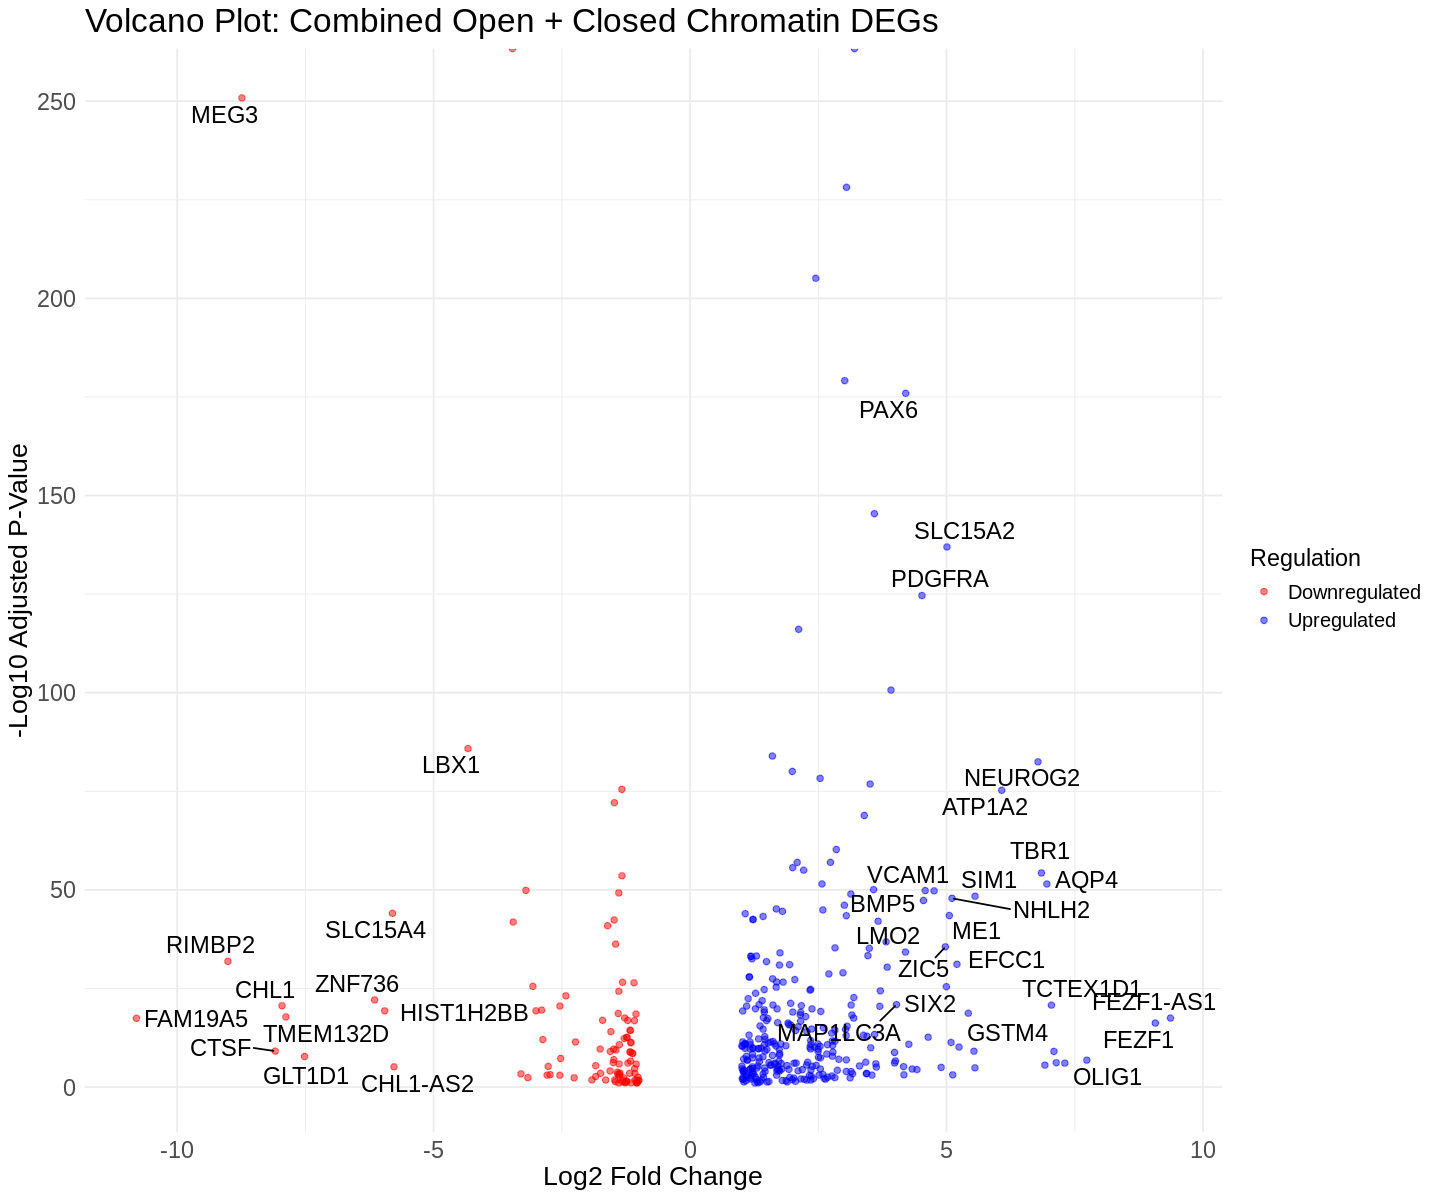

In [ ]:
combined_atac_rna <- bind_rows(open_atac_rna, closed_atac_rna)

# Volcano Plot
ggplot(combined_atac_rna, aes(x = log2FoldChange, y = -log10(padj))) +
  geom_point(aes(color = log2FoldChange > 0), alpha = 0.5) +
  scale_color_manual(values = c("red", "blue"), labels = c("Downregulated", "Upregulated")) +
  geom_text_repel(data = combined_atac_rna %>% filter(padj < 0.05 & abs(log2FoldChange) > 4),
                  aes(label = gene_symbol), size = 5, max.overlaps = 10) +
  labs(title = "Volcano Plot: Combined Open + Closed Chromatin DEGs",
       x = "Log2 Fold Change",
       y = "-Log10 Adjusted P-Value",
       color = "Regulation") +
  theme_minimal()+
theme(
    plot.title = element_text(size = 20),  # Increase title size
    axis.title = element_text(size = 16),  # Increase axis title size
    axis.text = element_text(size = 14),    # Increase axis text size
    legend.title = element_text(size = 14), # Increase legend title size
    legend.text = element_text(size = 12)   # Increase legend text size
  )
# Set plot dimensions (in inches)
options(repr.plot.width=12, repr.plot.height=10)
# or
#ggsave("my_volcano_plot.png", width = 12, height = 8)

In [ ]:
# Count TF occurrences in open chromatin
top_tfs_open <- open_tf_integration %>%
  count(TF, sort = TRUE) %>%
  top_n(10, n) # Get top 10 TFs

# Count TF occurrences in closed chromatin
top_tfs_closed <- closed_tf_integration %>%
  count(TF, sort = TRUE) %>%
  top_n(10, n) # Get top 10 TFs

# Display the results
print("Top TFs in Open Chromatin:")
print(top_tfs_open)

print("Top TFs in Closed Chromatin:")
print(top_tfs_closed)


[1] "Top TFs in Open Chromatin:"
# A tibble: 13 × 2
   TF         n
   <chr>  <int>
 1 PRDM14    10
 2 TP53      10
 3 SP1        8
 4 TEAD1      8
 5 E2F1       7
 6 ZNF263     7
 7 FOXP1      6
 8 MYC        6
 9 POU5F1     6
10 ESR1       5
11 MYOD1      5
12 PBX3       5
13 TEAD4      5
[1] "Top TFs in Closed Chromatin:"
# A tibble: 11 × 2
   TF          n
   <chr>   <int>
 1 TEAD1       6
 2 FOXP1       5
 3 ONECUT1     4
 4 ASCL1       3
 5 E2F1        3
 6 MEF2C       3
 7 MYC         3
 8 PBX2        3
 9 PRDM14      3
10 TCF12       3
11 ZEB2        3


In [ ]:
# Define upregulated (log2FC > 0) and downregulated (log2FC < 0)
open_tf_integration <- open_tf_integration %>%
  mutate(Regulation = ifelse(log2FoldChange > 0, "Upregulated", "Downregulated"))

closed_tf_integration <- closed_tf_integration %>%
  mutate(Regulation = ifelse(log2FoldChange > 0, "Upregulated", "Downregulated"))

# Count TF occurrences in upregulated genes (open + closed)
top_tfs_up <- bind_rows(open_tf_integration, closed_tf_integration) %>%
  filter(Regulation == "Upregulated") %>%
  count(TF, sort = TRUE) %>%
  top_n(10, n)

# Count TF occurrences in downregulated genes (open + closed)
top_tfs_down <- bind_rows(open_tf_integration, closed_tf_integration) %>%
  filter(Regulation == "Downregulated") %>%
  count(TF, sort = TRUE) %>%
  top_n(10, n)

# Display the results
print("Top TFs in Upregulated Genes:")
print(top_tfs_up)

print("Top TFs in Downregulated Genes:")
print(top_tfs_down)


[1] "Top TFs in Upregulated Genes:"
# A tibble: 15 × 2
   TF          n
   <chr>   <int>
 1 TEAD1      12
 2 FOXP1      10
 3 PRDM14     10
 4 TP53       10
 5 E2F1        8
 6 SP1         8
 7 ONECUT1     6
 8 TCF12       6
 9 GATA6       5
10 MYOD1       5
11 POU5F1      5
12 RUNX2       5
13 TEAD4       5
14 ZEB2        5
15 ZNF263      5
[1] "Top TFs in Downregulated Genes:"
# A tibble: 25 × 2
   TF          n
   <chr>   <int>
 1 MYC         5
 2 ZNF263      4
 3 ASCL1       3
 4 NANOG       3
 5 PBX3        3
 6 PRDM14      3
 7 SPIB        3
 8 ZNF143      3
 9 ATF7        2
10 BHLHE40     2
# ℹ 15 more rows


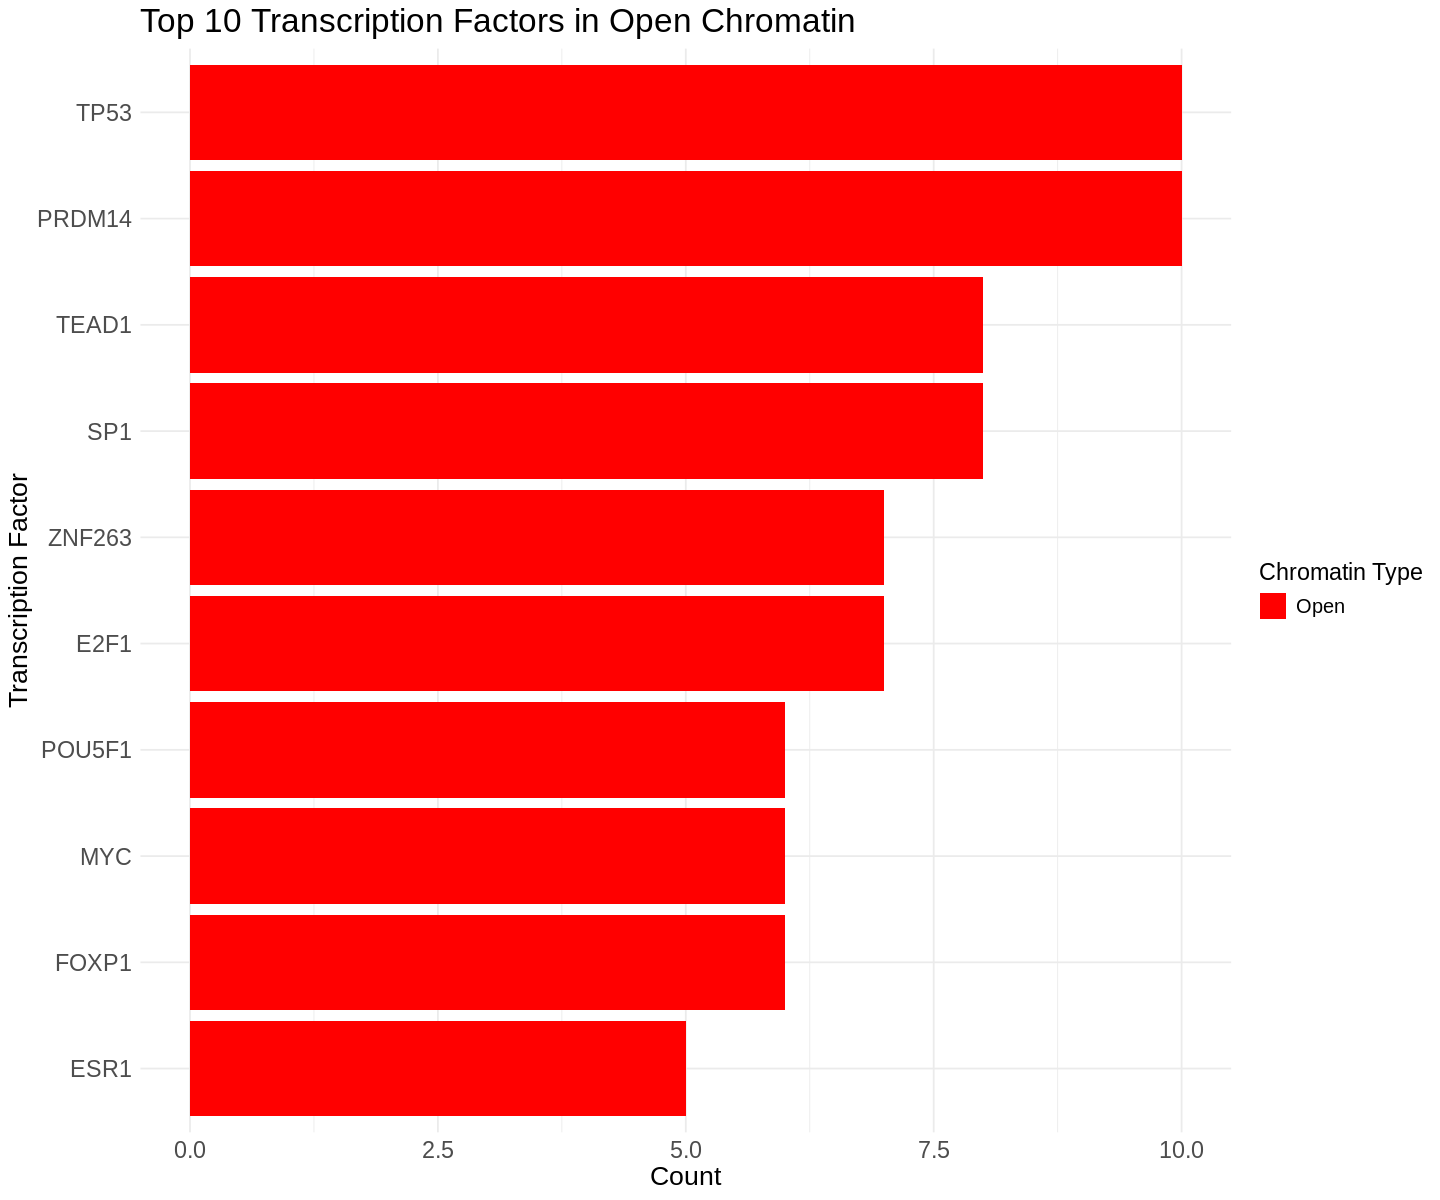

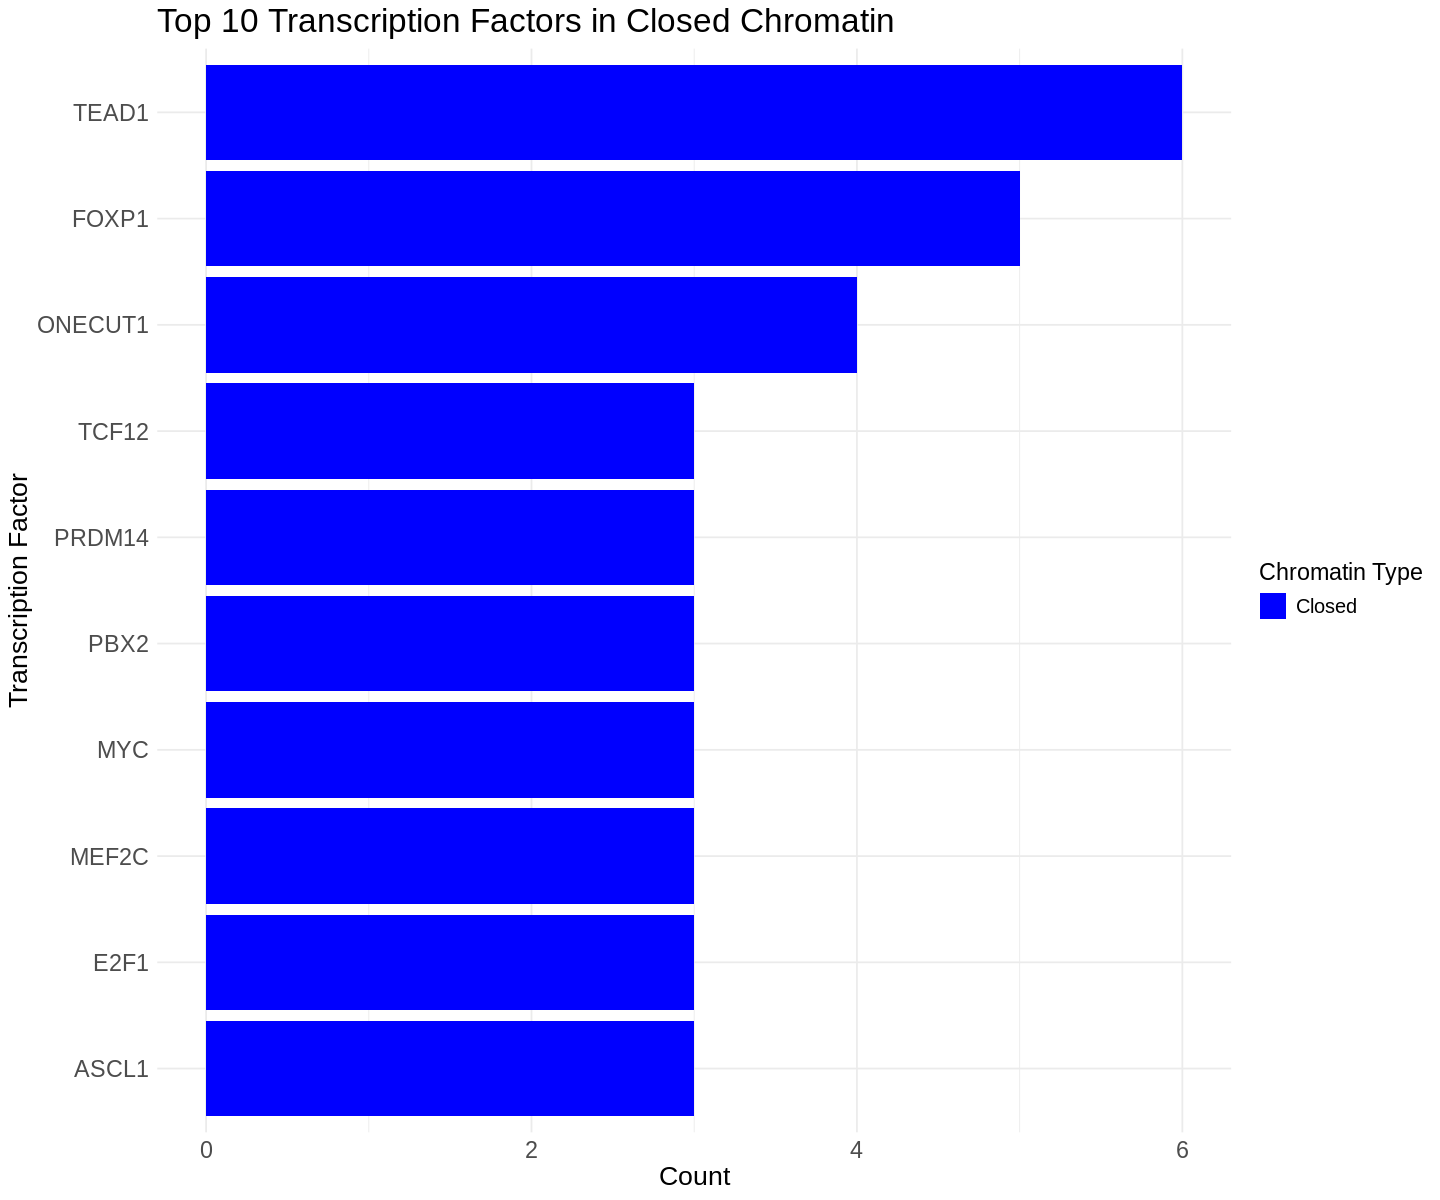

In [ ]:
library(ggplot2)
library(dplyr)

# Count TF occurrences in Open Chromatin and select top 10
tf_counts_open <- open_tf_integration %>%
  count(TF) %>%
  arrange(desc(n)) %>%
  slice_head(n = 10)  # Select top 10

# Count TF occurrences in Closed Chromatin and select top 10
tf_counts_closed <- closed_tf_integration %>%
  count(TF) %>%
  arrange(desc(n)) %>%
  slice_head(n = 10)  # Select top 10

# Plot for Open Chromatin TFs (Top 10)
ggplot(tf_counts_open, aes(x = reorder(TF, n), y = n, fill = "Open")) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  theme_minimal() +
  scale_fill_manual(values = c("Open" = "red")) +
  labs(title = "Top 10 Transcription Factors in Open Chromatin",
       x = "Transcription Factor",
       y = "Count",
       fill = "Chromatin Type")+
  theme(
      plot.title = element_text(size = 20),  # Increase title size
      axis.title = element_text(size = 16),  # Increase axis title size
      axis.text = element_text(size = 14),    # Increase axis text size
      legend.title = element_text(size = 14), # Increase legend title size
      legend.text = element_text(size = 12)   # Increase legend text size
    )
# Set plot dimensions (in inches)
options(repr.plot.width=12, repr.plot.height=10)

# Plot for Closed Chromatin TFs (Top 10)
ggplot(tf_counts_closed, aes(x = reorder(TF, n), y = n, fill = "Closed")) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  theme_minimal() +
  scale_fill_manual(values = c("Closed" = "blue")) +
  labs(title = "Top 10 Transcription Factors in Closed Chromatin",
       x = "Transcription Factor",
       y = "Count",
       fill = "Chromatin Type")+
  theme(
      plot.title = element_text(size = 20),  # Increase title size
      axis.title = element_text(size = 16),  # Increase axis title size
      axis.text = element_text(size = 14),    # Increase axis text size
      legend.title = element_text(size = 14), # Increase legend title size
      legend.text = element_text(size = 12)   # Increase legend text size
    )


#Motif Enrichment (gimmemotifs)

done in another colab notebook = GM

#Integrating Gimme#

In [ ]:
closed_gimme <- read_lines("matched_closed_tfs.txt")  # Replace with the actual file name
open_gimme <- read_lines("matched_open_tfs.txt")  # Replace with the actual file name
closed_gimme_tfs <- toupper(closed_gimme)
open_gimme_tfs <- toupper(open_gimme)


In [ ]:
filtered_open_tf_integration <- open_tf_integration %>%
  filter(toupper(TF) %in% open_gimme_tfs)


In [ ]:
filtered_open_tf_integration

gene_id,seqnames,start,end,width,strand,gene_id.y,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Type,TF,Weight,Regulation
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
ENSG00000007372,chr11,31797400,31801860,4461,*,5080,PAX6,1306.27765,4.203292,0.1469924,28.595300,7.69000e-180,1.2200e-176,Open,SP1,1,Upregulated
ENSG00000008441,chr19,13022520,13025510,2991,*,4784,NFIX,41.98554,2.541504,0.4324943,5.876386,4.19000e-09,4.0600e-08,Open,IRF2,1,Upregulated
ENSG00000008441,chr19,13022520,13025510,2991,*,4784,NFIX,41.98554,2.541504,0.4324943,5.876386,4.19000e-09,4.0600e-08,Open,PRDM1,1,Upregulated
ENSG00000008441,chr19,13022520,13025510,2991,*,4784,NFIX,41.98554,2.541504,0.4324943,5.876386,4.19000e-09,4.0600e-08,Open,ZNF384,1,Upregulated
ENSG00000008441,chr19,13022520,13025510,2991,*,4784,NFIX,41.98554,2.541504,0.4324943,5.876386,4.19000e-09,4.0600e-08,Open,ZNF263,-1,Upregulated
ENSG00000018625,chr1,160115440,160118550,3111,*,477,ATP1A2,317.23668,6.075508,0.3241736,18.741528,2.27000e-78,5.5600e-76,Open,MYC,1,Upregulated
ENSG00000026103,chr10,88950810,88953890,3081,*,355,FAS,171.65578,1.741542,0.2832388,6.148669,7.81000e-10,8.2600e-09,Open,CEBPA,1,Upregulated
ENSG00000026103,chr10,88950810,88953890,3081,*,355,FAS,171.65578,1.741542,0.2832388,6.148669,7.81000e-10,8.2600e-09,Open,ETS1,1,Upregulated
ENSG00000026103,chr10,88950810,88953890,3081,*,355,FAS,171.65578,1.741542,0.2832388,6.148669,7.81000e-10,8.2600e-09,Open,FOS,1,Upregulated


In [ ]:
filtered_closed_tf_integration <- closed_tf_integration %>%
  filter(toupper(TF) %in% closed_gimme_tfs)

In [ ]:
closed_tf_integration

gene_id,seqnames,start,end,width,strand,gene_id.y,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Type,TF,Weight,Regulation
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,ATF7,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,CEBPA,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,ESR1,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,HNF1A,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,JUN,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,STAT1,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,STAT3,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,STAT5A,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,STAT5B,1,Downregulated


In [ ]:
filtered_closed_tf_integration

gene_id,seqnames,start,end,width,strand,gene_id.y,gene_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Type,TF,Weight,Regulation
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,ATF7,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,CEBPA,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,ESR1,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,HNF1A,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,JUN,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,STAT1,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,STAT3,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,STAT5A,1,Downregulated
ENSG00000017427,chr12,102479860,102482080,2221,*,3479,IGF1,79.1322,-2.870331,0.38191246,-7.515678,5.66e-14,9.07e-13,Closed,STAT5B,1,Downregulated


In [ ]:

up_closed_genes <- filtered_closed_tf_integration %>%
  filter(Regulation == "Upregulated") %>%
  select(gene_symbol) %>%
  distinct()  # Remove duplicates

down_closed_genes <- filtered_closed_tf_integration %>%
  filter(Regulation == "Downregulated") %>%
  select(gene_symbol) %>%
  distinct()  # Remove duplicates

up_open_genes <- filtered_open_tf_integration %>%
  filter(Regulation == "Upregulated") %>%
  select(gene_symbol) %>%
  distinct()  # Remove duplicates

down_open_genes <- filtered_open_tf_integration %>%
  filter(Regulation == "Downregulated") %>%
  select(gene_symbol) %>%
  distinct()  # Remove duplicates

In [ ]:
# Save upregulated closed genes
write.table(up_closed_genes, "up_closed_genes.tsv", sep = "\t", row.names = FALSE, col.names = TRUE, quote = FALSE)

# Save downregulated closed genes
write.table(down_closed_genes, "down_closed_genes.tsv", sep = "\t", row.names = FALSE, col.names = TRUE, quote = FALSE)

# Save upregulated open genes
write.table(up_open_genes, "up_open_genes.tsv", sep = "\t", row.names = FALSE, col.names = TRUE, quote = FALSE)

# Save downregulated open genes
write.table(down_open_genes, "down_open_genes.tsv", sep = "\t", row.names = FALSE, col.names = TRUE, quote = FALSE)


In [ ]:
up_closed_genes

gene_symbol
<chr>
PTPRZ1
SOX6
TANC1
PARD3B
PDZRN3
GTDC1
ITPR2
DIAPH3
LRIG1


In [ ]:
up_closed_TFs <- filtered_closed_tf_integration %>%
  filter(Regulation == "Upregulated") %>%
  select(TF) %>%
  distinct()  # Remove duplicates

down_closed_TFs <- filtered_closed_tf_integration %>%
  filter(Regulation == "Downregulated") %>%
  select(TF) %>%
  distinct()  # Remove duplicates

up_open_TFs <- filtered_open_tf_integration %>%
  filter(Regulation == "Upregulated") %>%
  select(TF) %>%
  distinct()  # Remove duplicates

down_open_TFs <- filtered_open_tf_integration %>%
  filter(Regulation == "Downregulated") %>%
  select(TF) %>%
  distinct()  # Remove duplicates

In [ ]:
nrow(up_closed_TFs)
nrow(down_closed_TFs)
nrow(up_open_TFs)
nrow(down_open_TFs)

[1] 42

[1] 54

[1] 132

[1] 41

In [ ]:
# Save TF lists for STRINGdb input
write_csv(up_closed_TFs, "TFs_for_STRINGdb_Up_Closed.csv")
write_csv(down_closed_TFs, "TFs_for_STRINGdb_Down_Closed.csv")
write_csv(up_open_TFs, "TFs_for_STRINGdb_Up_Open.csv")
write_csv(down_open_TFs, "TFs_for_STRINGdb_Down_Open.csv")



In [ ]:
up_closed_TFs <- data.frame(TF = unique(as.character(up_closed_TFs$TF)))
down_closed_TFs <- data.frame(TF = unique(as.character(down_closed_TFs$TF)))
up_open_TFs <- data.frame(TF = unique(as.character(up_open_TFs$TF)))
down_open_TFs <- data.frame(TF = unique(as.character(down_open_TFs$TF)))

#Final STRINGdb#

In [ ]:
up_closed_mapped <- string_db$map(up_closed_TFs, "TF", removeUnmappedRows = TRUE)


In [ ]:
up_closednetwork <- string_db$get_interactions(up_closed_mapped$STRING_id)


In [ ]:
# Generate a STRING network URL
string_url <- string_db$get_link(up_closed_mapped$STRING_id)

# Print the URL (open this in a browser to view and download the PNG)
print(string_url)

# OPTIONAL: Automatically download the PNG using system command
download.file(string_url, "up_closed_mapped.png", mode="wb")

[1] "https://version-11-5.string-db.org/cgi/link?to=C89D1A4CA86F2EB5"


In [ ]:
down_closed_mapped <- string_db$map(down_closed_TFs, "TF", removeUnmappedRows = TRUE)

In [ ]:
down_closednetwork <- string_db$get_interactions(down_closed_mapped$STRING_id)


In [ ]:
# Generate a STRING network URL
string_url <- string_db$get_link(down_closed_mapped$STRING_id)

# Print the URL (open this in a browser to view and download the PNG)
print(string_url)

# OPTIONAL: Automatically download the PNG using system command
download.file(string_url, "down_closed_mapped.png", mode="wb")

[1] "https://version-11-5.string-db.org/cgi/link?to=8A99004FDE475789"


In [ ]:
up_open_mapped <- string_db$map(up_open_TFs, "TF", removeUnmappedRows = TRUE)


In [ ]:
up_opendnetwork <- string_db$get_interactions(up_open_mapped$STRING_id)


In [ ]:
# Generate a STRING network URL
string_url <- string_db$get_link(up_open_mapped$STRING_id)

# Print the URL (open this in a browser to view and download the PNG)
print(string_url)

# OPTIONAL: Automatically download the PNG using system command
download.file(string_url, "up_open_mapped.png", mode="wb")

[1] "https://version-11-5.string-db.org/cgi/link?to=6A99BD99A6022E66"


In [ ]:
down_open_mapped <- string_db$map(down_open_TFs, "TF", removeUnmappedRows = TRUE)


In [ ]:
down_opennetwork <- string_db$get_interactions(down_open_mapped$STRING_id)


In [ ]:
# Generate a STRING network URL
string_url <- string_db$get_link(down_open_mapped$STRING_id)

# Print the URL (open this in a browser to view and download the PNG)
print(string_url)

# OPTIONAL: Automatically download the PNG using system command
download.file(string_url, "down_open_mapped.png", mode="wb")

[1] "https://version-11-5.string-db.org/cgi/link?to=58E5B60D7CC87CFB"


###Stringdb###

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("STRINGdb")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.3 (2025-02-28)

Installing package(s) 'BiocVersion', 'STRINGdb'

also installing the dependencies ‘plogr’, ‘bitops’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’, ‘gtools’, ‘caTools’, ‘png’, ‘sqldf’, ‘plyr’, ‘igraph’, ‘gplots’, ‘hash’, ‘plotrix’


Old packages: 'commonmark', 'knitr', 'mime', 'tzdb', 'xml2'



In [ ]:
library(STRINGdb)
library(readr)

In [ ]:
integrate_TF <- read_csv("TFs_for_STRINGdb.csv")


Rows: 170 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): TF

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
integrate_Closed_TF <- read_csv("TFs_for_STRINGdb_Closed.csv")


Rows: 85 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): TF

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
integrate_Open_TF <- read_csv("TFs_for_STRINGdb_Open.csv")


Rows: 150 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): TF

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
library(magrittr)
library(dplyr)


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [ ]:
integrate_TF <- integrate_TF %>%
  select(TF) %>%
  mutate(TF = as.character(TF))  # Convert to character type if needed

In [ ]:
integrate_Open_TF <- integrate_Open_TF %>%
  select(TF) %>%
  mutate(TF = as.character(TF))  # Convert to character type if needed

In [ ]:
integrate_Closed_TF <- integrate_Closed_TF %>%
  select(TF) %>%
  mutate(TF = as.character(TF))  # Convert to character type if needed

In [ ]:
integrate_TF <- data.frame(TF = integrate_TF$TF)  # Adjust column name if needed
integrate_Open_TF <- data.frame(TF = integrate_Open_TF$TF)  # Adjust column name if needed
integrate_Closed_TF <- data.frame(TF = integrate_Closed_TF$TF)  # Adjust column name if needed


In [ ]:
integrate_TF

TF
<chr>
SP1
IRF2
PRDM1
ZNF384
ZNF263
MYC
CEBPA
ETS1
FOS


In [ ]:
string_db <- STRINGdb$new(version="11.5", species=9606, score_threshold=400, input_directory="")


In [ ]:
# Map TFs to STRING IDs
mapped_tf <- string_db$map(integrate_TF, "TF", removeUnmappedRows=TRUE)

# Get the interaction network
network <- string_db$get_interactions(mapped_tf$STRING_id)


In [ ]:
# Generate a STRING network URL
string_url <- string_db$get_link(mapped_tf$STRING_id)

# Print the URL (open this in a browser to view and download the PNG)
print(string_url)

# OPTIONAL: Automatically download the PNG using system command
download.file(string_url, "STRING_network.png", mode="wb")

[1] "https://version-11-5.string-db.org/cgi/link?to=70875CEE9E218E1F"


In [ ]:
# Map TFs to STRING IDs
mapped_tf <- string_db$map(integrate_Open_TF, "TF", removeUnmappedRows=TRUE)

# Get the interaction network
network <- string_db$get_interactions(mapped_tf$STRING_id)


In [ ]:
# Generate a STRING network URL
string_url <- string_db$get_link(mapped_tf$STRING_id)

# Print the URL (open this in a browser to view and download the PNG)
print(string_url)

# OPTIONAL: Automatically download the PNG using system command
download.file(string_url, "STRING_Opennetwork.png", mode="wb")

[1] "https://version-11-5.string-db.org/cgi/link?to=E35DEA06D7BABDC5"


In [ ]:
# Map TFs to STRING IDs
mapped_tf <- string_db$map(integrate_Closed_TF, "TF", removeUnmappedRows=TRUE)

# Get the interaction network
network <- string_db$get_interactions(mapped_tf$STRING_id)


In [ ]:
# Generate a STRING network URL
string_url <- string_db$get_link(mapped_tf$STRING_id)

# Print the URL (open this in a browser to view and download the PNG)
print(string_url)

# OPTIONAL: Automatically download the PNG using system command
download.file(string_url, "STRING_network.png", mode="wb")

[1] "https://version-11-5.string-db.org/cgi/link?to=9C23D01D5849BF42"


**Up v. Down**

In [ ]:
# Separate upregulated and downregulated genes within open chromatin
open_upregulated <- open_tf_integration %>% filter(log2FoldChange > 0)
open_downregulated <- open_tf_integration %>% filter(log2FoldChange < 0)

# Separate upregulated and downregulated genes within closed chromatin
closed_upregulated <- closed_tf_integration %>% filter(log2FoldChange > 0)
closed_downregulated <- closed_tf_integration %>% filter(log2FoldChange < 0)

# Save them as CSV files (optional)
write.csv(open_upregulated, "open_upregulated.csv", row.names = FALSE)
write.csv(open_downregulated, "open_downregulated.csv", row.names = FALSE)
write.csv(closed_upregulated, "closed_upregulated.csv", row.names = FALSE)
write.csv(closed_downregulated, "closed_downregulated.csv", row.names = FALSE)

# Check number of genes in each category
cat("Open Upregulated:", nrow(open_upregulated), "\n")
cat("Open Downregulated:", nrow(open_downregulated), "\n")
cat("Closed Upregulated:", nrow(closed_upregulated), "\n")
cat("Closed Downregulated:", nrow(closed_downregulated), "\n")


Open Upregulated: 273 
Open Downregulated: 53 
Closed Upregulated: 62 
Closed Downregulated: 69 


In [ ]:
# Extract unique TFs from CLOSED UP Chromatin
closed_upregulated_unique <- unique(closed_upregulated$TF)
tfs_closed_upregulated <- data.frame(TF = closed_upregulated_unique)

# Extract unique TFs from Closed Chromatin
closed_downregulated_unique <- unique(closed_downregulated$TF)
tfs_closed_downregulated <- data.frame(TF = closed_downregulated_unique)

# Save as CSV for STRINGdb
write.csv(tfs_closed_upregulated, "tfs_closed_upregulated.csv", row.names = FALSE)
write.csv(tfs_closed_downregulated, "tfs_closed_downregulated.csv", row.names = FALSE)


In [ ]:
# Extract unique TFs from Open UP Chromatin
open_upregulated_unique <- unique(open_upregulated$TF)
tfs_open_upregulated <- data.frame(TF = open_upregulated_unique)

# Extract unique TFs from Closed Chromatin
open_downregulated_unique <- unique(open_downregulated$TF)
tfs_open_downregulated <- data.frame(TF = open_downregulated_unique)

# Save as CSV for STRINGdb
write.csv(tfs_open_upregulated, "tfs_open_upregulated.csv", row.names = FALSE)
write.csv(tfs_open_downregulated, "tfs_open_downregulated.csv", row.names = FALSE)


In [ ]:
cat("Open Upregulated:", nrow(tfs_open_upregulated), "\n")
cat("Open Downregulated:", nrow(tfs_open_downregulated), "\n")
cat("Closed Upregulated:", nrow(tfs_closed_upregulated), "\n")
cat("Closed Downregulated:", nrow(tfs_closed_downregulated), "\n")

Open Upregulated: 136 
Open Downregulated: 42 
Closed Upregulated: 46 
Closed Downregulated: 58 


In [ ]:
tfs_open_upregulated_S <- read_csv("tfs_open_upregulated.csv")
tfs_open_downregulated_S <- read_csv("tfs_open_downregulated.csv")
tfs_closed_upregulated_S <- read_csv("tfs_closed_upregulated.csv")
tfs_closed_downregulated <- read_csv("tfs_closed_downregulated.csv")


Rows: 136 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): TF

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 42 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): TF

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 46 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): TF

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 58 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): TF

ℹ Use `spec()` to ret

In [ ]:
tfs_open_upregulated_S <- tfs_open_upregulated_S %>%
  select(TF) %>%
  mutate(TF = as.character(TF))  # Convert to character type if needed
tfs_open_downregulated_S <- tfs_open_downregulated_S %>%
  select(TF) %>%
  mutate(TF = as.character(TF))  # Convert to character type if needed
tfs_closed_upregulated_S <- tfs_closed_upregulated_S %>%
  select(TF) %>%
  mutate(TF = as.character(TF))  # Convert to character type if needed
tfs_closed_downregulated <- tfs_closed_downregulated %>%
  select(TF) %>%
  mutate(TF = as.character(TF))  # Convert to character type if needed



In [ ]:
tfs_open_upregulated_S <- data.frame(TF = tfs_open_upregulated_S$TF)  # Adjust column name if needed
tfs_open_downregulated_S <- data.frame(TF = tfs_open_downregulated_S$TF)  # Adjust column name if needed
tfs_closed_upregulated_S <- data.frame(TF = tfs_closed_upregulated_S$TF)  # Adjust column name if needed
tfs_closed_downregulated <- data.frame(TF = tfs_closed_downregulated$TF)  # Adjust column name if needed

In [ ]:
# Map TFs to STRING IDs
mapped_tf <- string_db$map(tfs_open_upregulated_S, "TF", removeUnmappedRows=TRUE)

# Get the interaction network
network <- string_db$get_interactions(mapped_tf$STRING_id)


In [ ]:
# Generate a STRING network URL
string_url <- string_db$get_link(mapped_tf$STRING_id)

# Print the URL (open this in a browser to view and download the PNG)
print(string_url)

# OPTIONAL: Automatically download the PNG using system command
download.file(string_url, "tfs_open_upregulated_S.png", mode="wb")

[1] "https://version-11-5.string-db.org/cgi/link?to=ABBC41ECE22F9D5C"


In [ ]:
# Map TFs to STRING IDs
mapped_tf <- string_db$map(tfs_open_downregulated_S, "TF", removeUnmappedRows=TRUE)

# Get the interaction network
network <- string_db$get_interactions(mapped_tf$STRING_id)


In [ ]:
# Generate a STRING network URL
string_url <- string_db$get_link(mapped_tf$STRING_id)

# Print the URL (open this in a browser to view and download the PNG)
print(string_url)

# OPTIONAL: Automatically download the PNG using system command
download.file(string_url, "tfs_open_downregulated_S.png", mode="wb")

[1] "https://version-11-5.string-db.org/cgi/link?to=25B3E3F818E45DBD"


In [ ]:
# Map TFs to STRING IDs
mapped_tf <- string_db$map(tfs_closed_upregulated_S, "TF", removeUnmappedRows=TRUE)

# Get the interaction network
network <- string_db$get_interactions(mapped_tf$STRING_id)


In [ ]:
# Generate a STRING network URL
string_url <- string_db$get_link(mapped_tf$STRING_id)

# Print the URL (open this in a browser to view and download the PNG)
print(string_url)

# OPTIONAL: Automatically download the PNG using system command
download.file(string_url, "tfs_closed_upregulated_S.png", mode="wb")

[1] "https://version-11-5.string-db.org/cgi/link?to=6C89086A07A1898F"


In [ ]:
# Map TFs to STRING IDs
mapped_tf <- string_db$map(tfs_closed_downregulated, "TF", removeUnmappedRows=TRUE)

# Get the interaction network
network <- string_db$get_interactions(mapped_tf$STRING_id)


In [ ]:
# Generate a STRING network URL
string_url <- string_db$get_link(mapped_tf$STRING_id)

# Print the URL (open this in a browser to view and download the PNG)
print(string_url)

# OPTIONAL: Automatically download the PNG using system command
download.file(string_url, "tfs_closed_downregulated.png", mode="wb")

[1] "https://version-11-5.string-db.org/cgi/link?to=D9F21919E60D0EF7"
